## **Problem Statement**

### **Business Context**

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## **Objective**
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## **Data Description**
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## **Importing necessary libraries**

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")


In [ ]:
# Library to help with statistical analysis
import scipy.stats as stats

# import the scipy package and check the version to be sure that the version is above 1.6.1 so that some updated functions do not throw error.
import scipy
scipy.__version__

'1.11.4'

## **Loading the dataset**

In [ ]:
# import drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

# read the data from file
df = pd.read_csv('/content/drive/MyDrive/DSBA - UTA/Project 6/Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/DSBA - UTA/Project 6/Test.csv')

# copying data to another varaible to avoid any changes to original data
data = df.copy()
data_test = df_test.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### **Displaying the first few rows of the dataset**

#### **Train dataset**

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


#### **Test dataset**

In [ ]:
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


### **Checking the shape of the dataset**

In [ ]:
# View the shape of the Train dataset and count the number of rows and columns of the dataset
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 20000 rows and 41 columns


**Observation:** There are 20,000 rows and 41 columns in the train dataset.

In [ ]:
# View the shape of the Test dataset and count the number of rows and columns of the dataset
print(f'There are {data_test.shape[0]} rows and {data_test.shape[1]} columns')

There are 5000 rows and 41 columns


**Observation:** There are 5,000 rows and 41 columns in the test dataset.

### **Checking the data types of the columns for the dataset**

In [ ]:
# Checking the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

**Observation:** All of the above datatypes are as expected.

### **Checking for duplicate values**

In [ ]:
# Checking the for any duplicate records
data.duplicated().sum()

0

**Observation:** The dataset doesn't contain any duplicate values.

### **Checking for missing values**

In [ ]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

V1       0.090
V2       0.090
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

In [ ]:
# let's check for missing values in the data
round(data_test.isnull().sum() / data_test.isnull().count() * 100, 2)

V1       0.100
V2       0.120
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

**Observation:** There are 18 missing records of the train dataset & 5 & 6 records in V1 & V2 columns of the test dataset respectively. We shall impute them later.

### **Statistical summary of the dataset**

In [ ]:
# Obtaining statistical summary of numerical and categorical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


## **Exploratory Data Analysis (EDA)**

### **Univariate analysis**

### **Plotting histograms and boxplots for all the variables**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

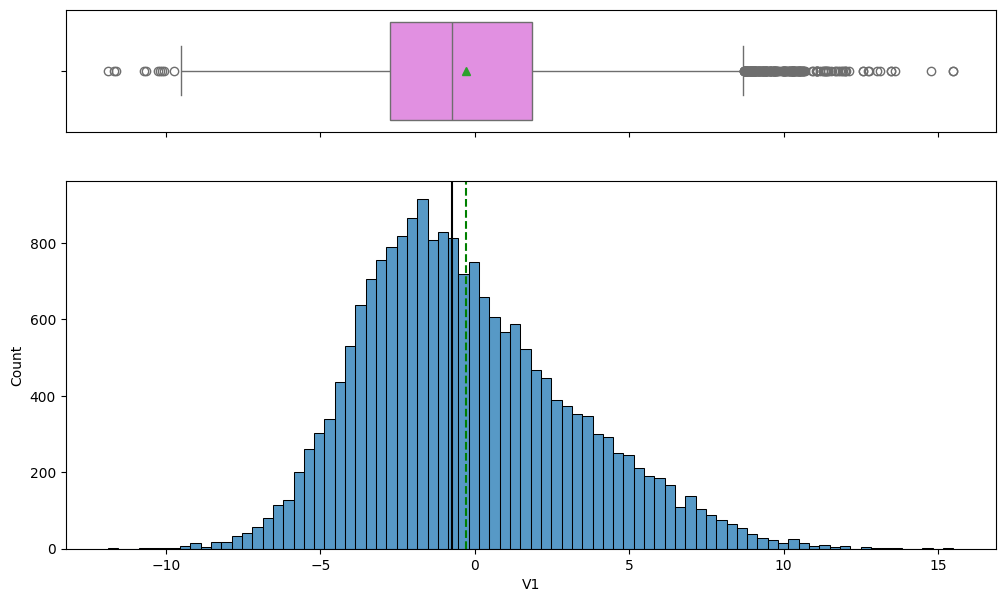

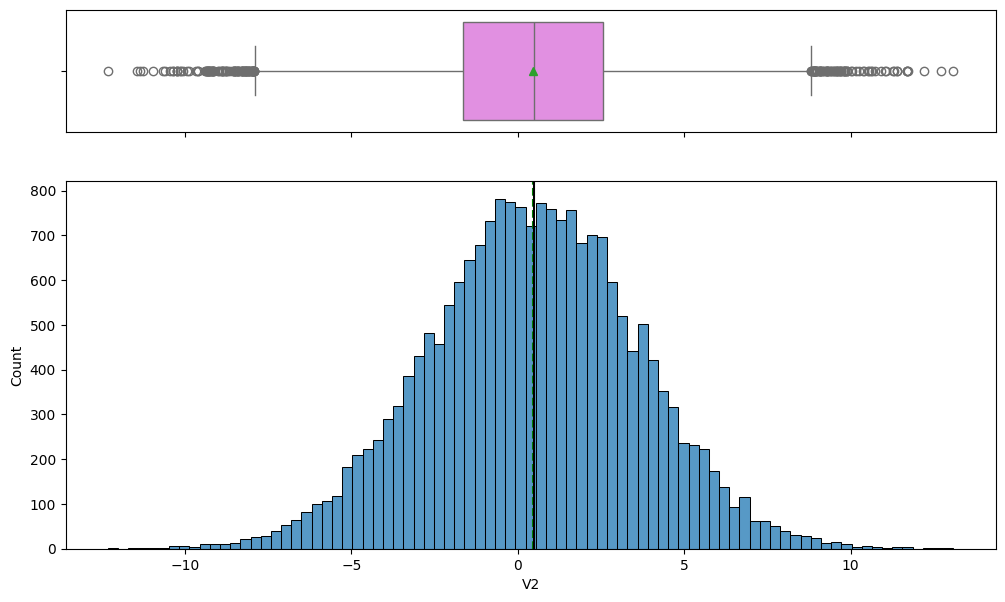

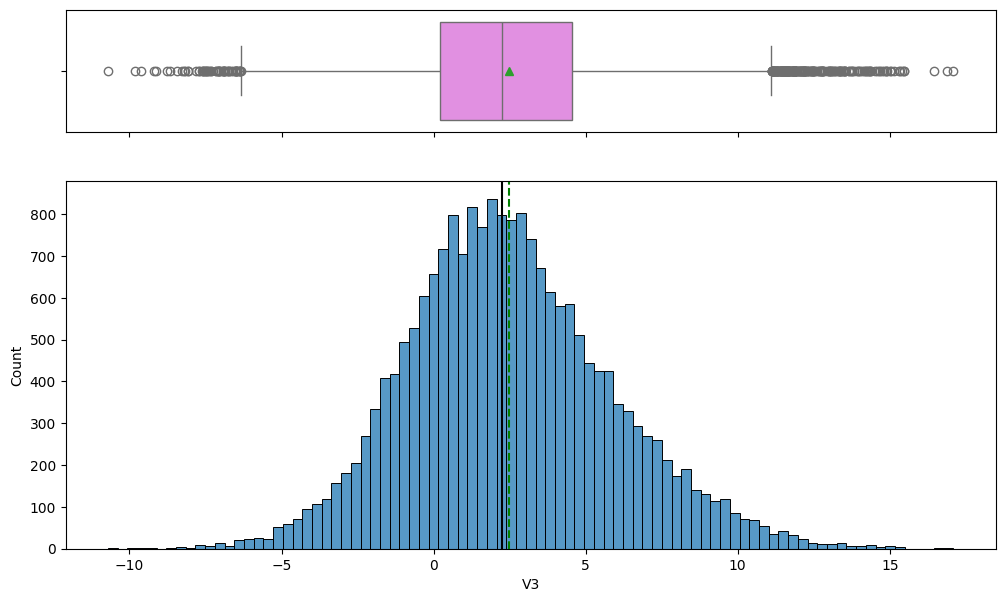

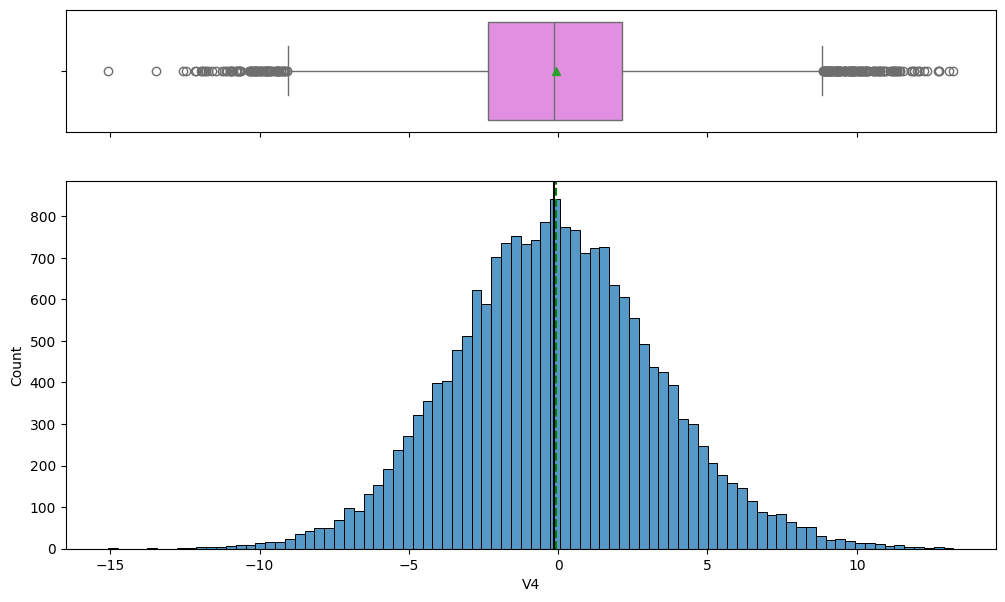

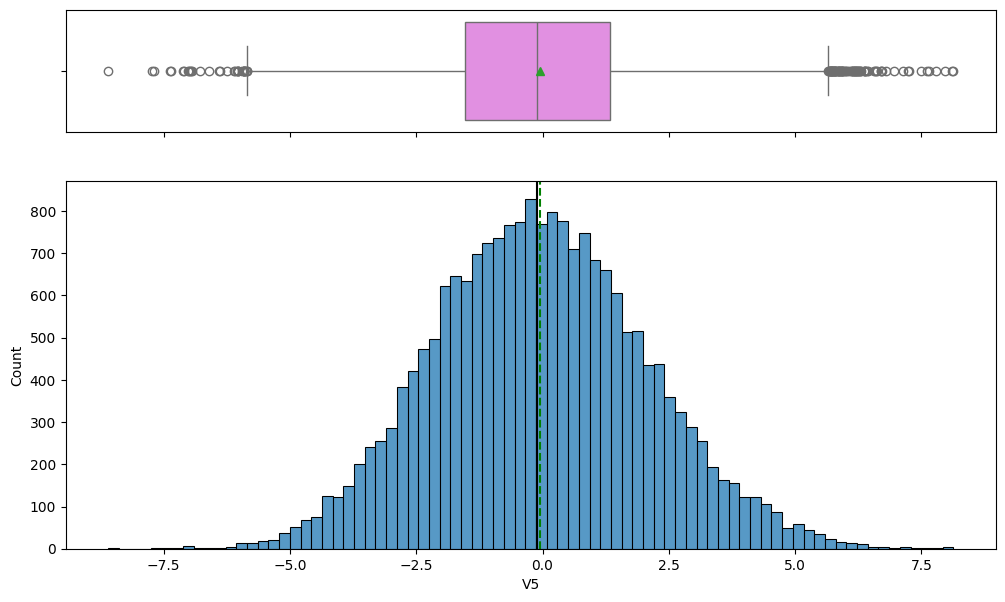

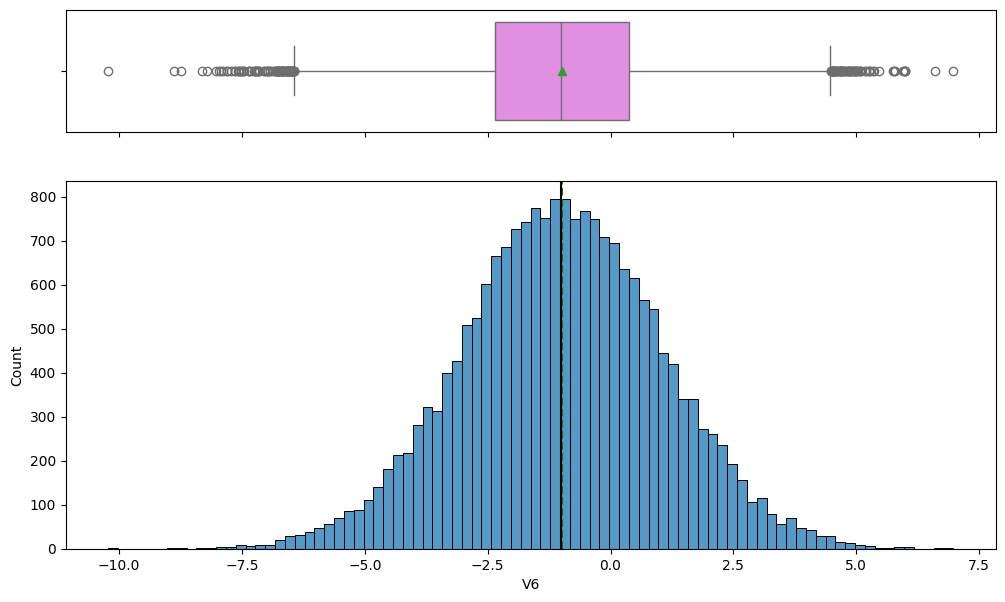

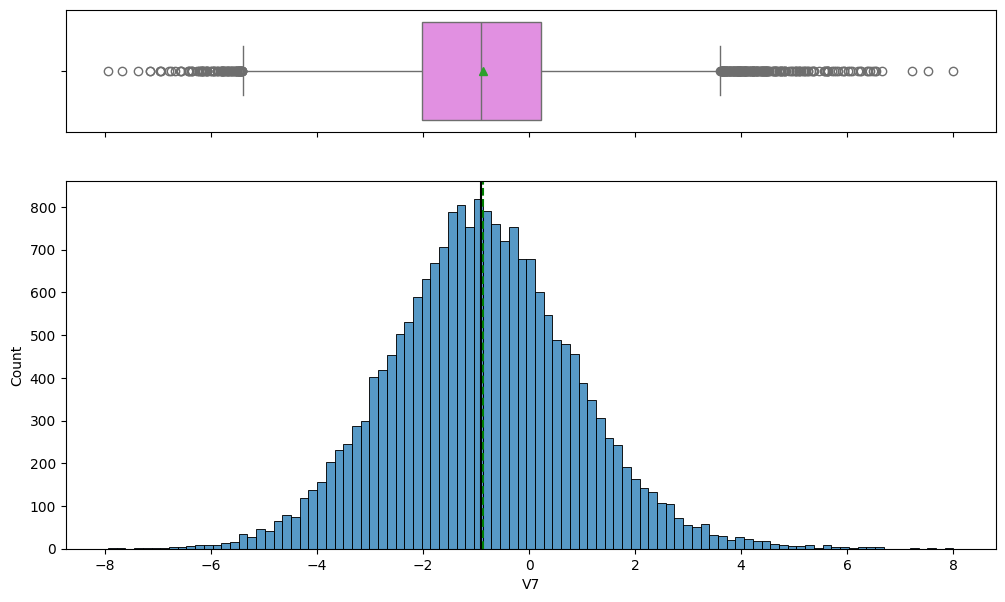

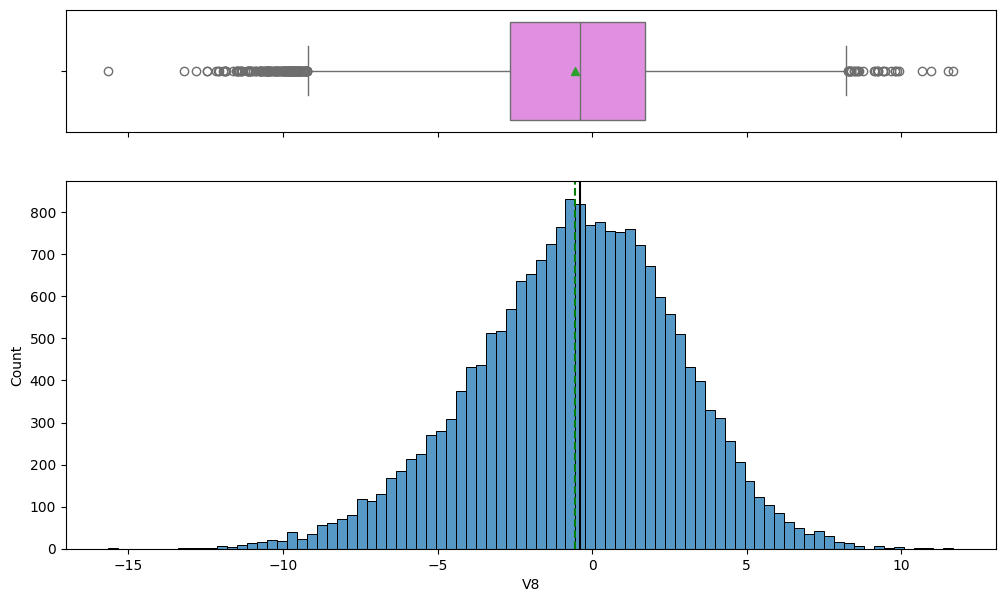

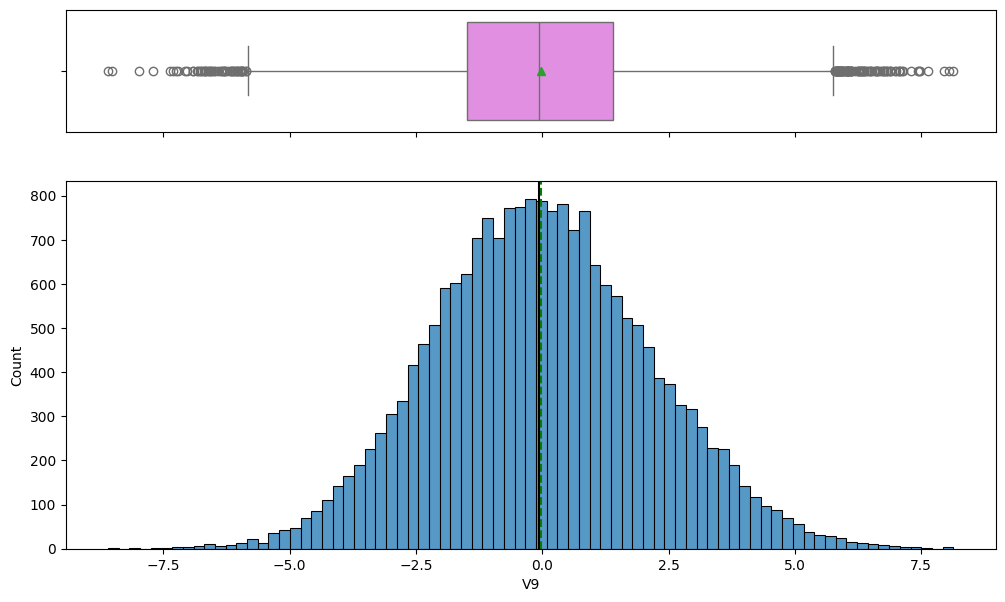

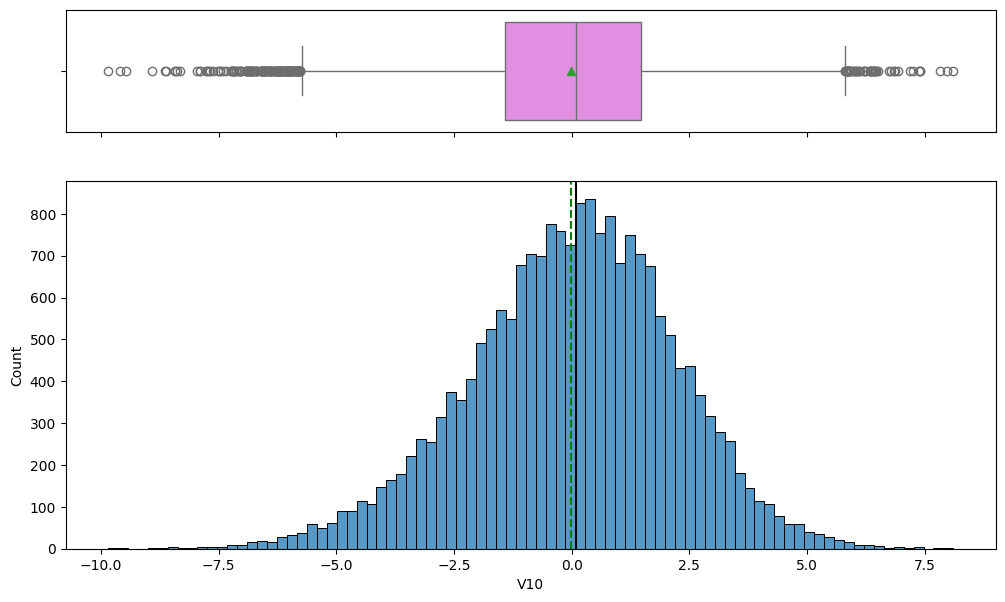

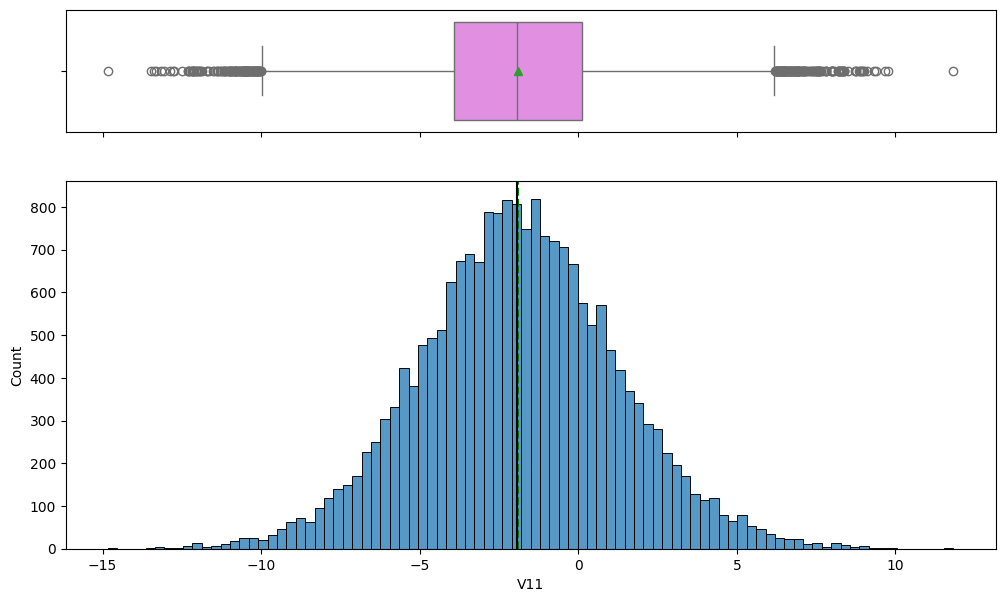

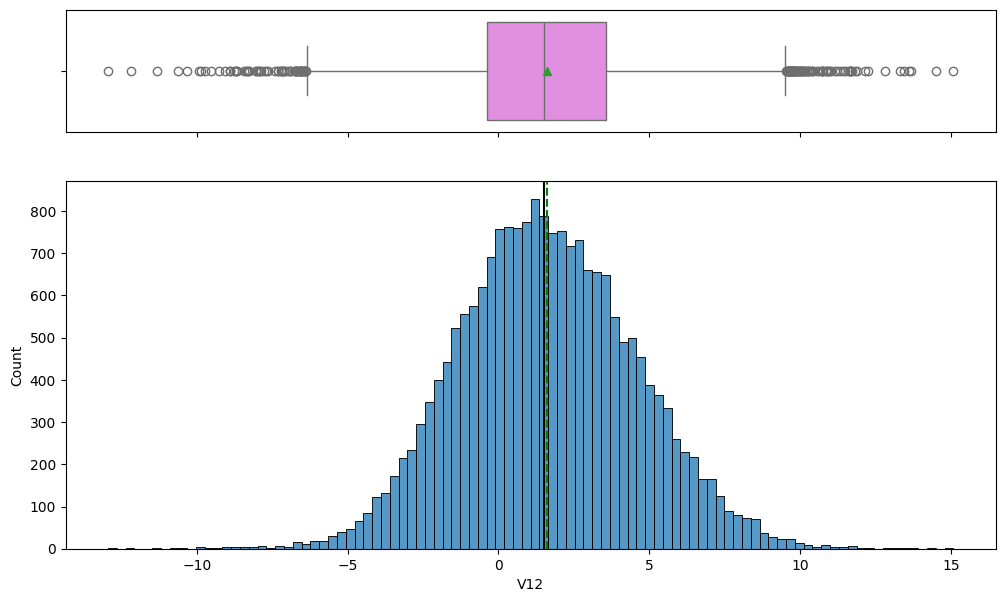

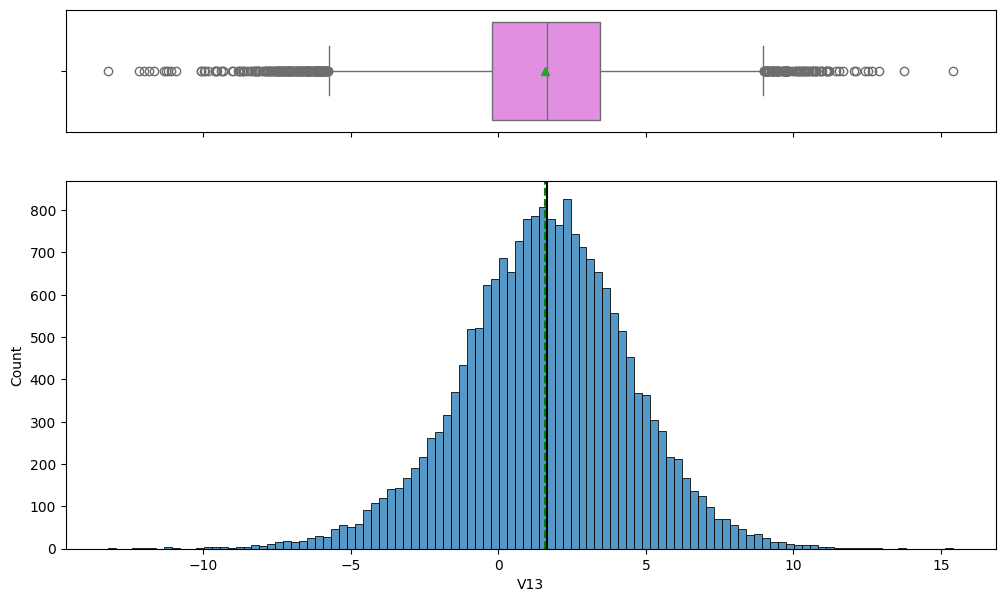

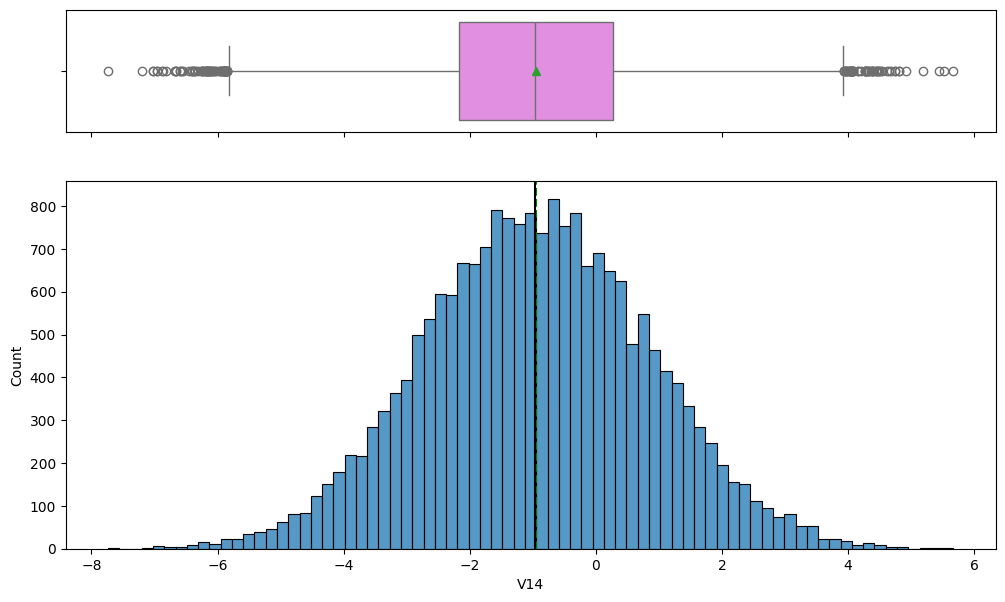

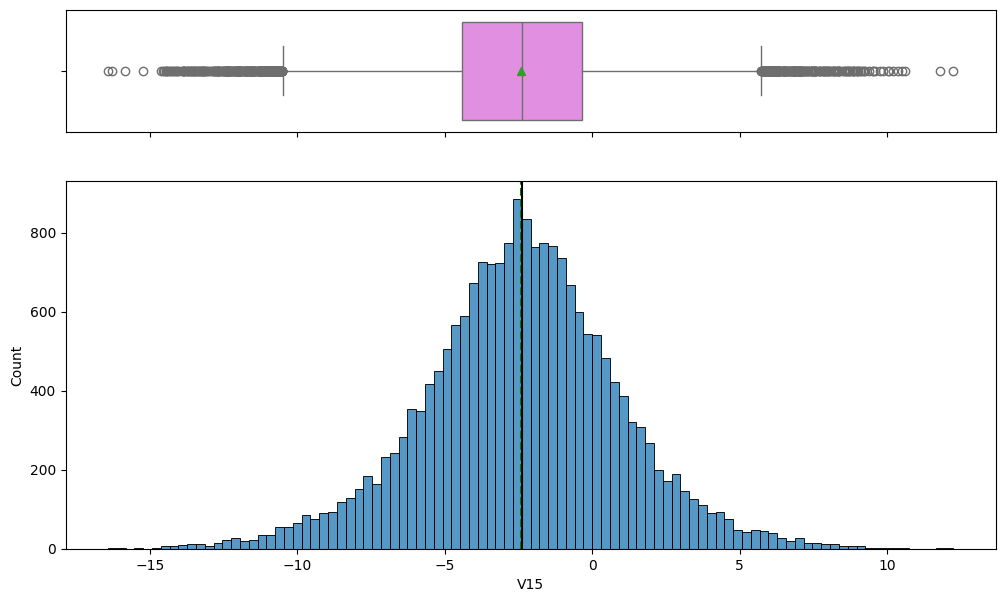

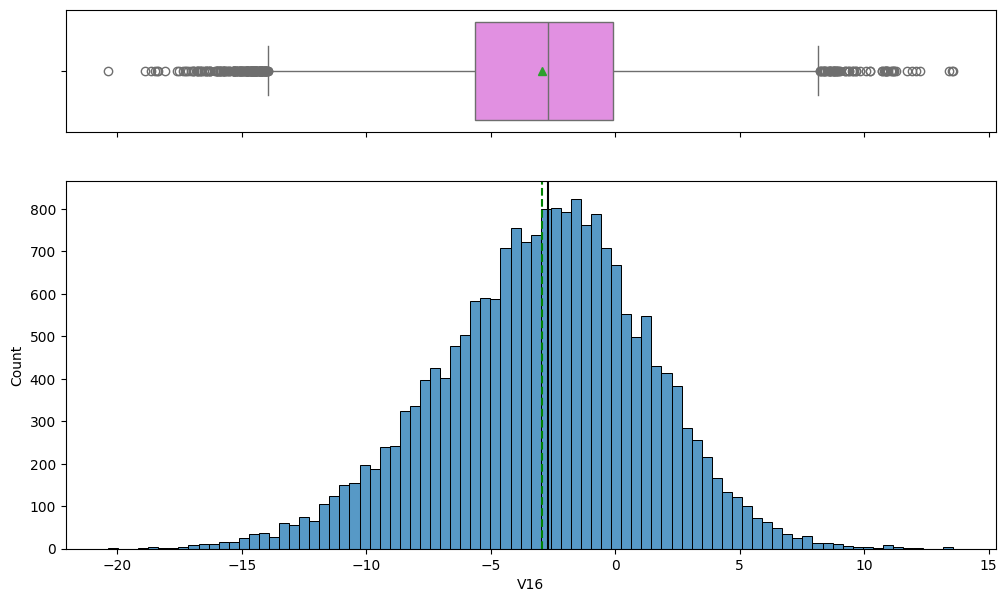

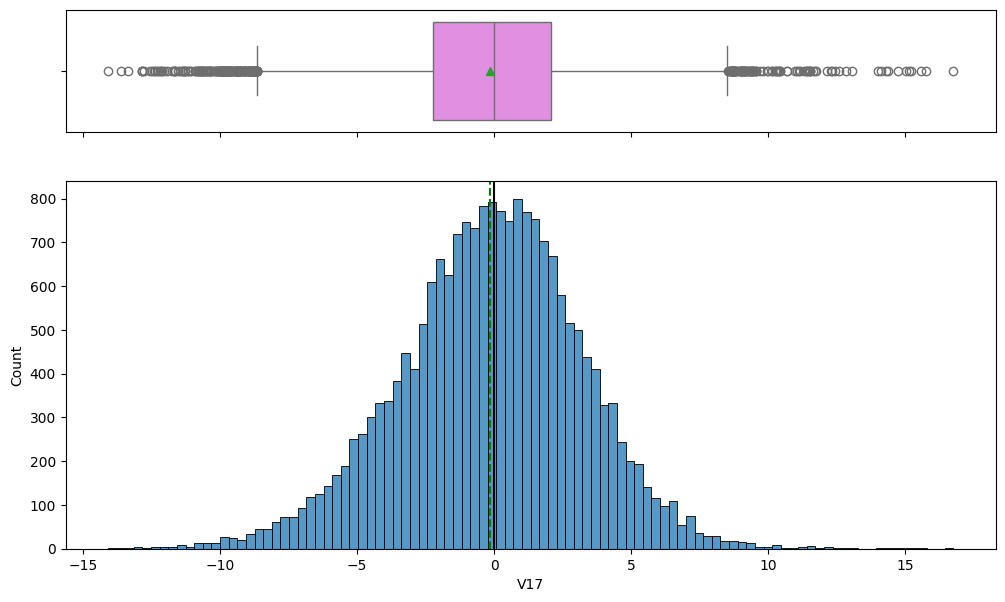

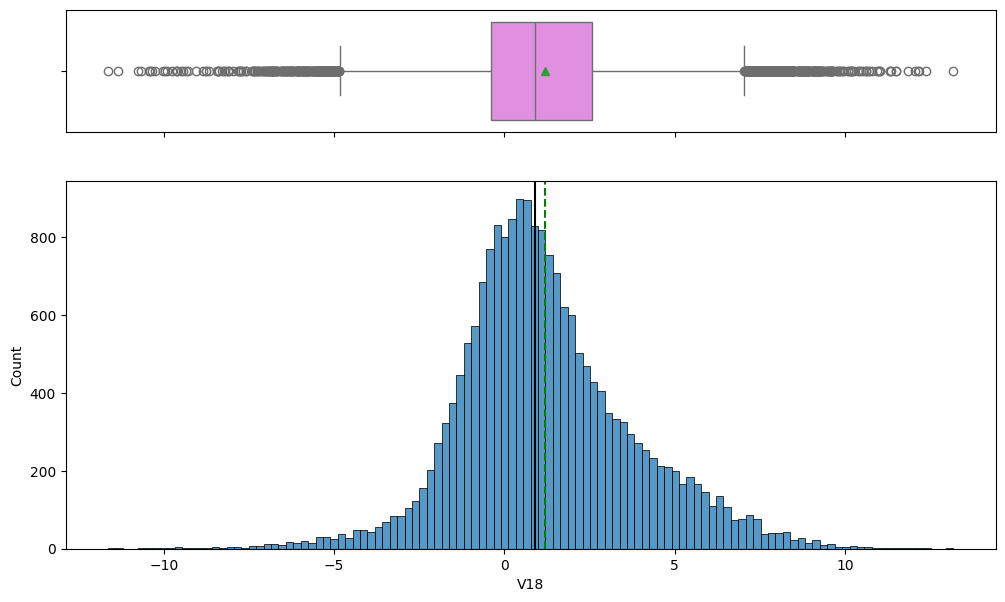

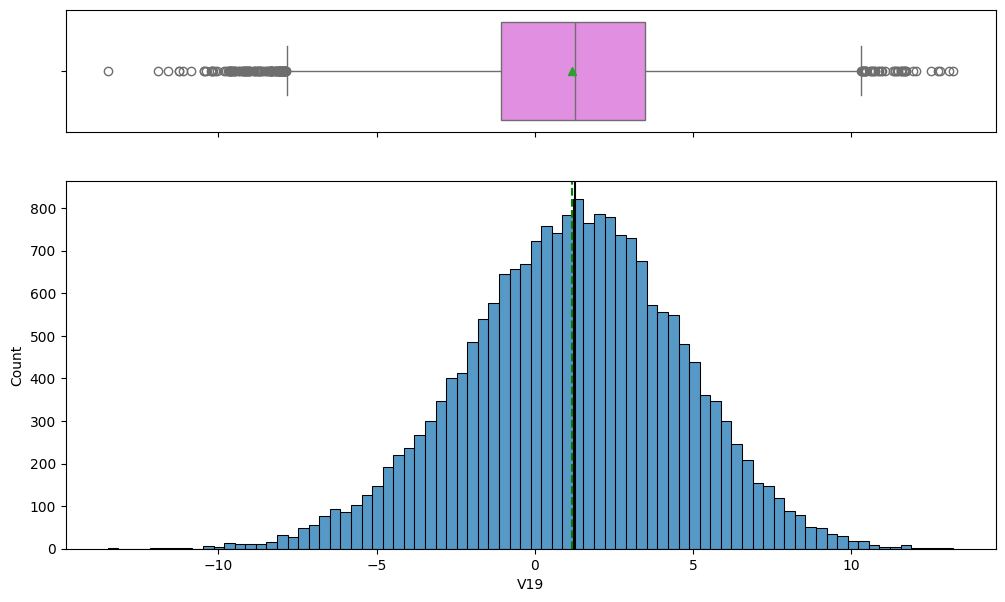

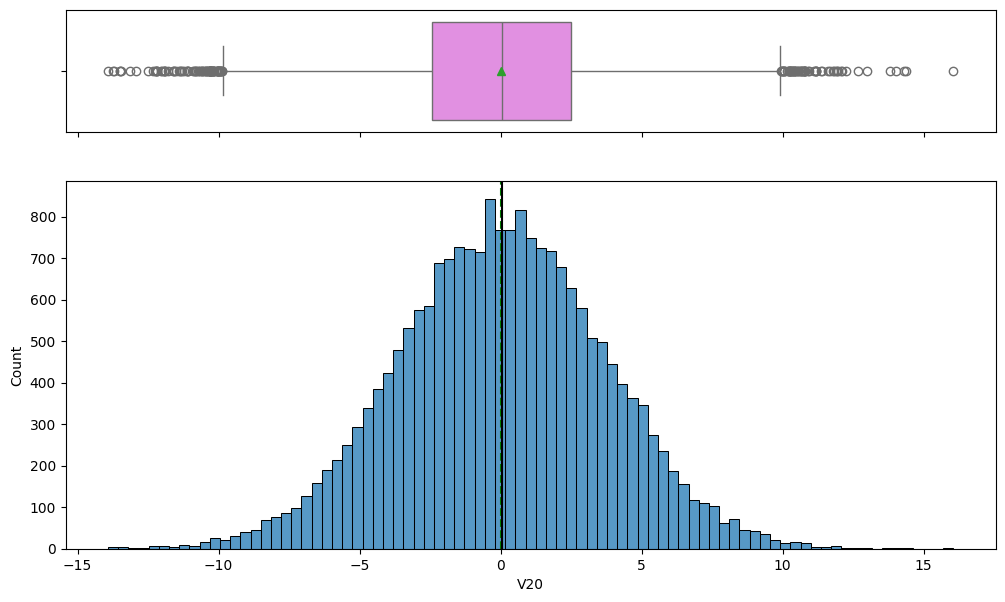

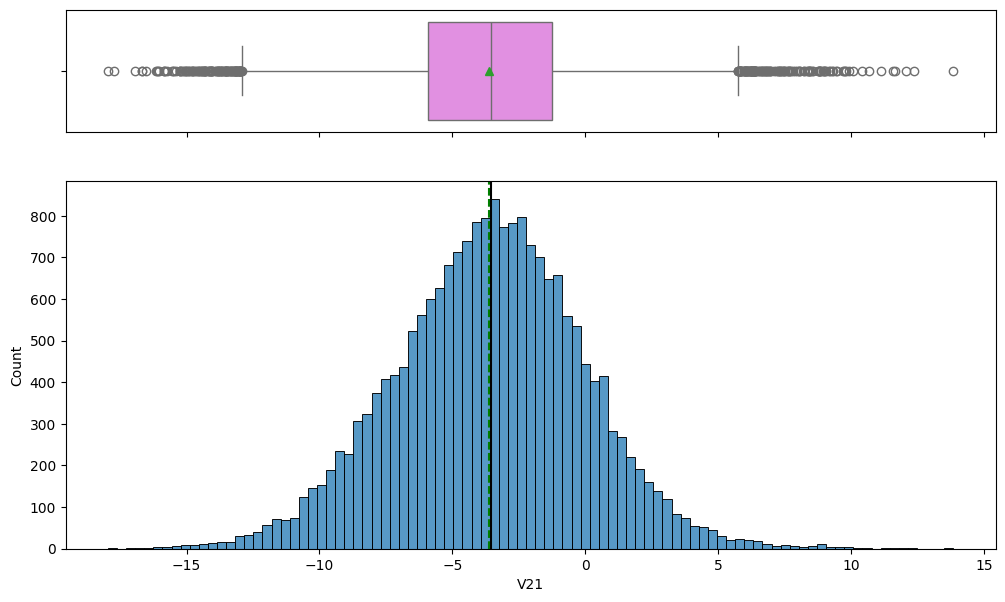

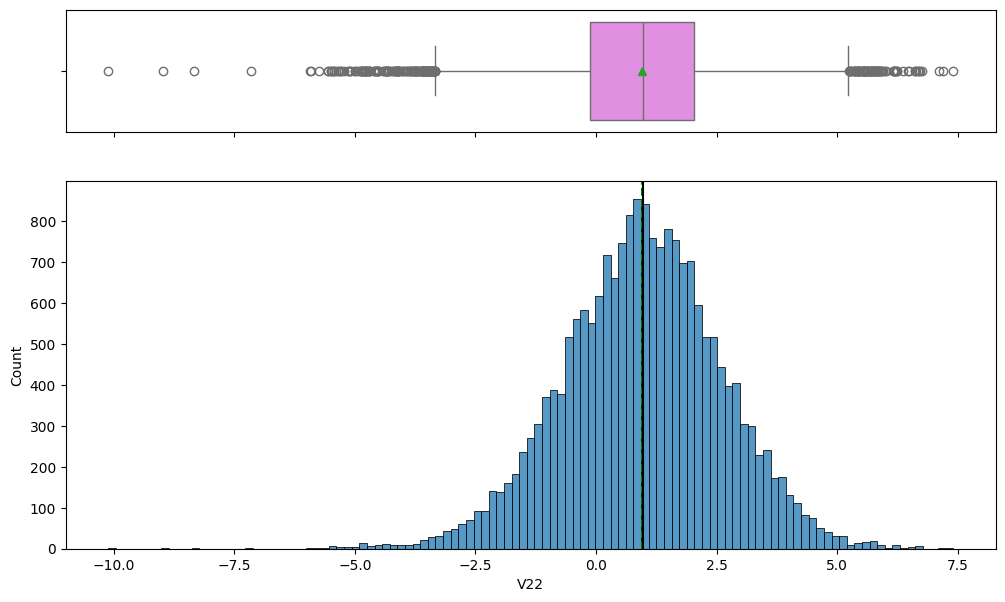

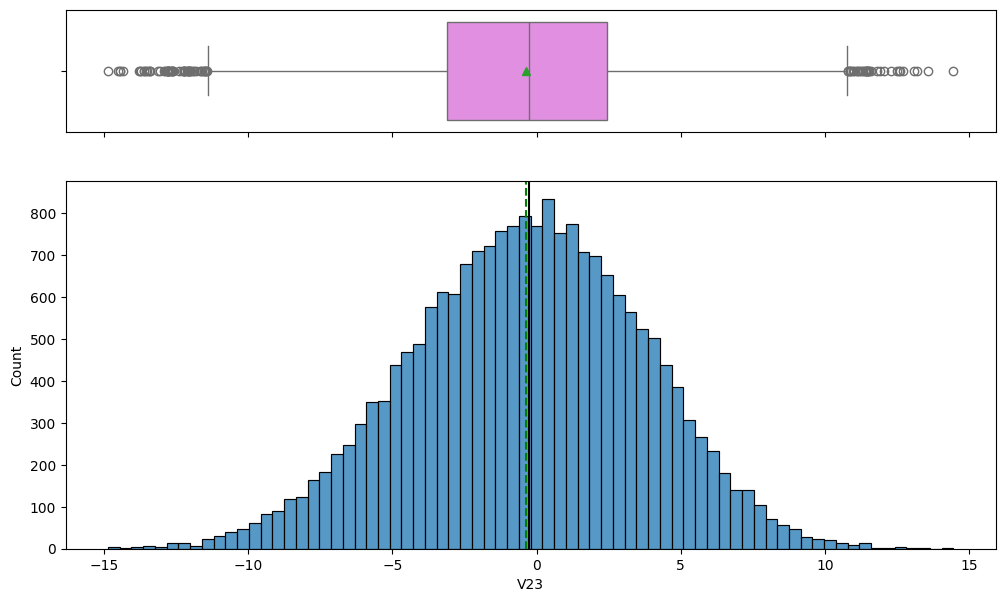

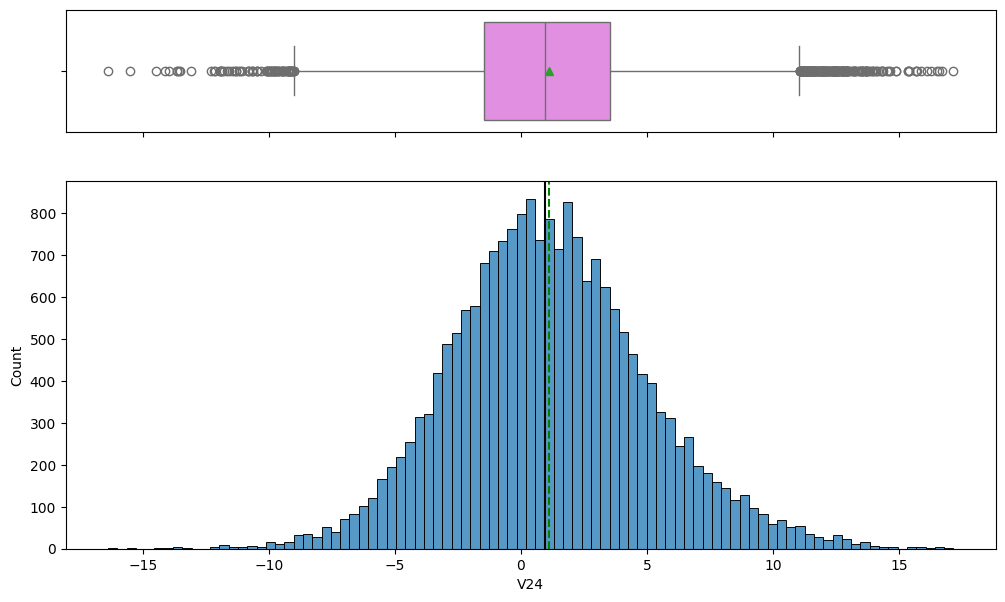

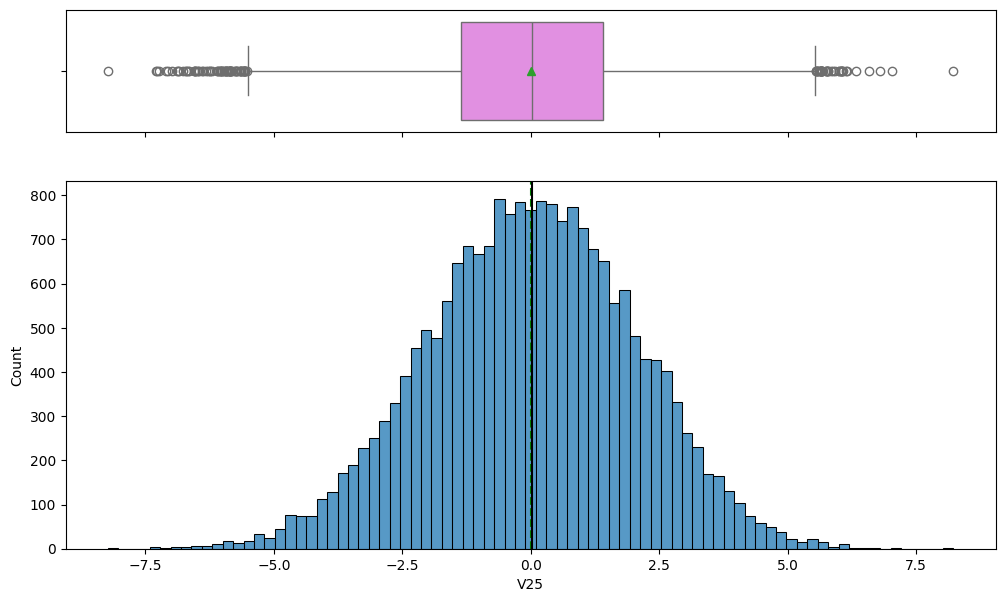

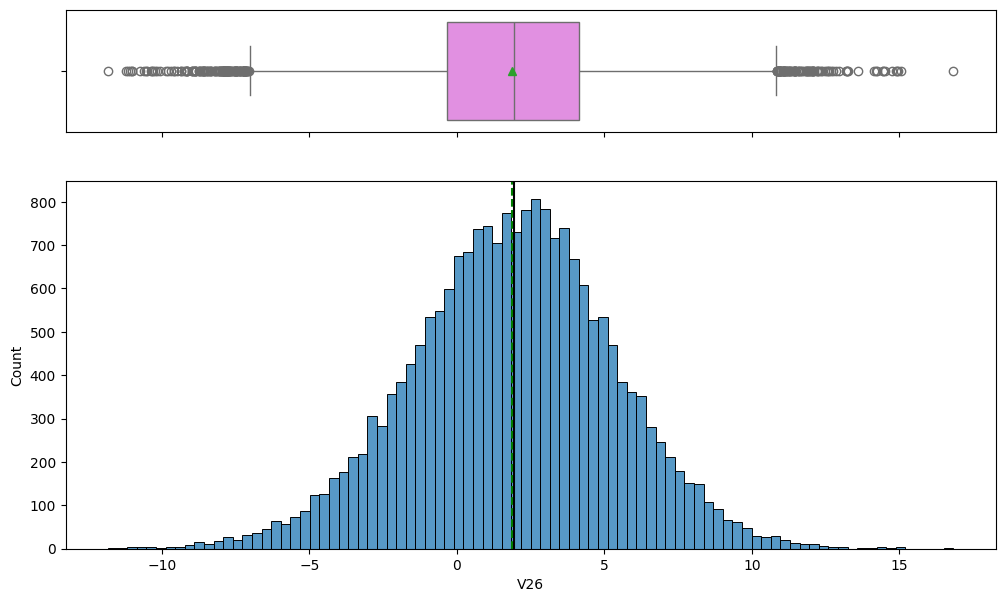

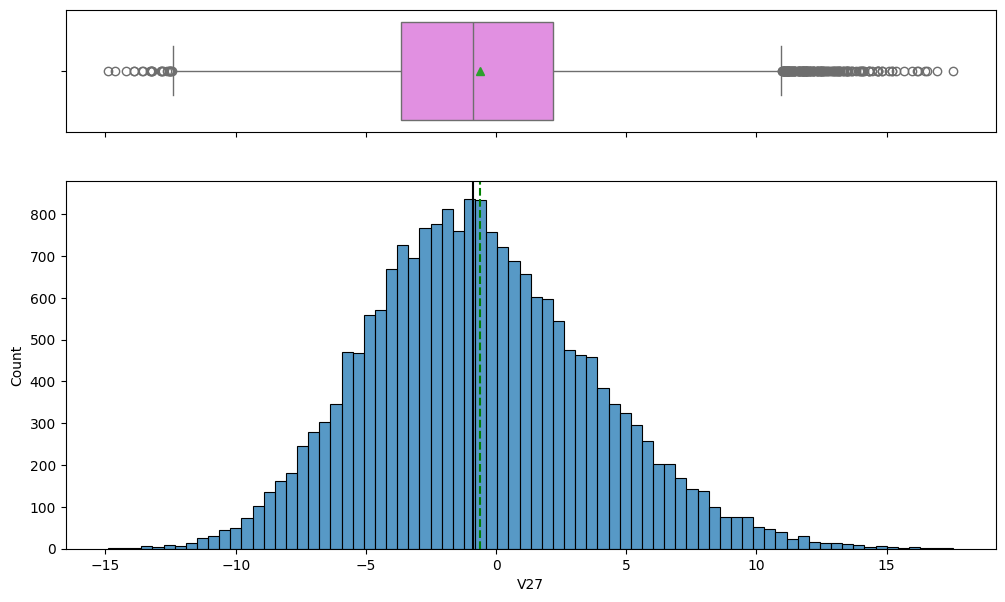

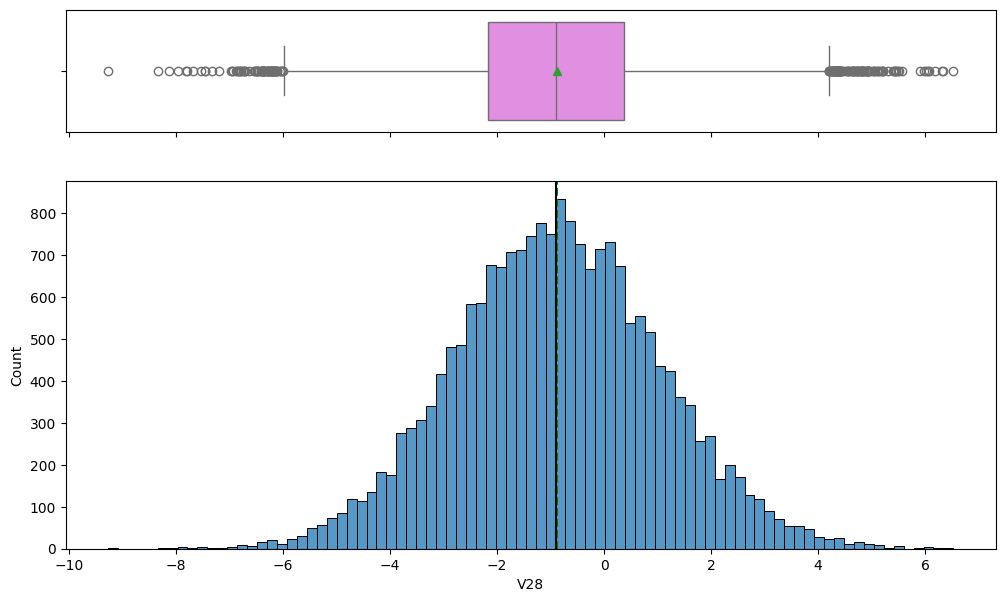

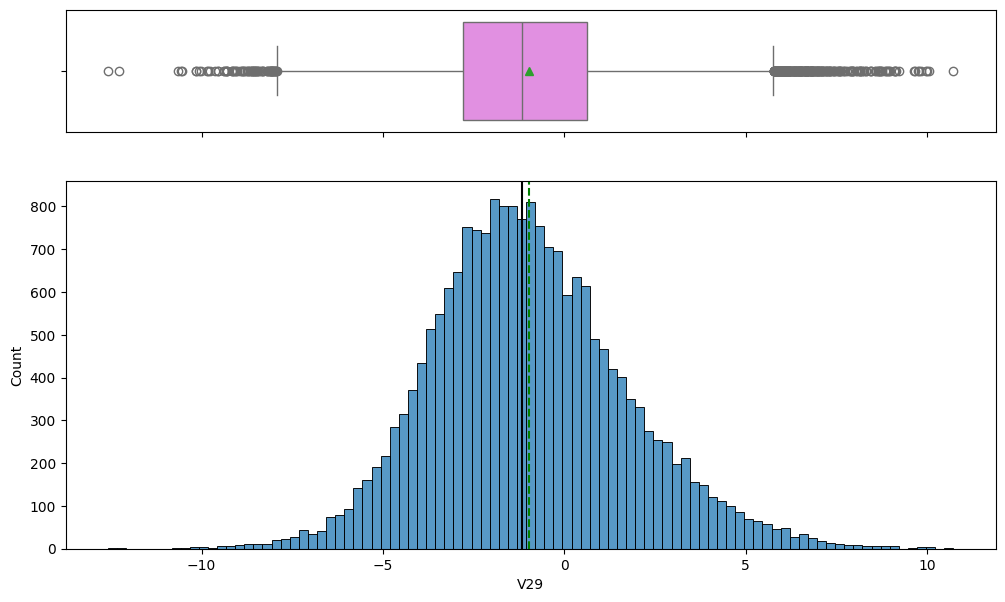

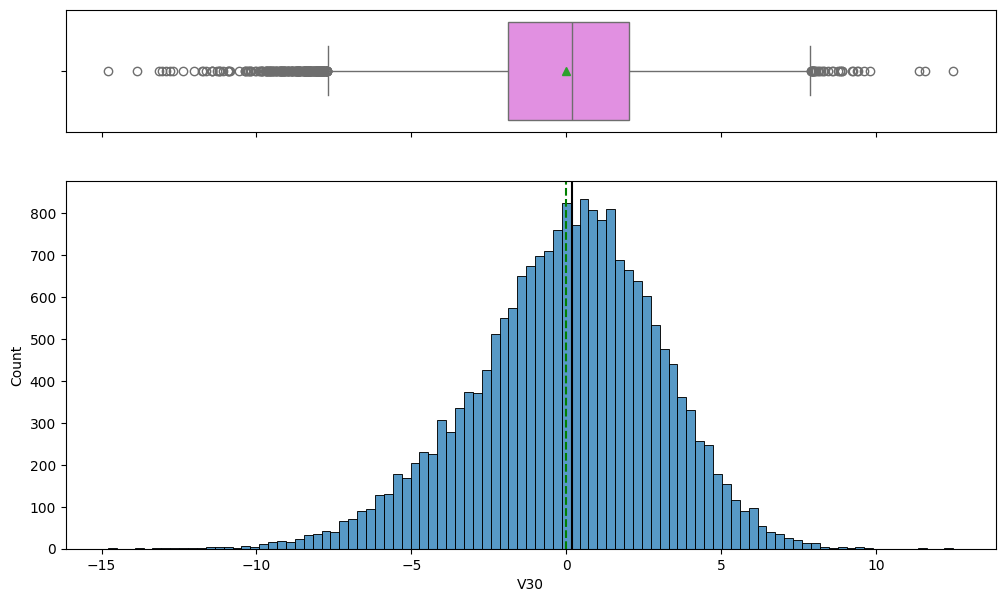

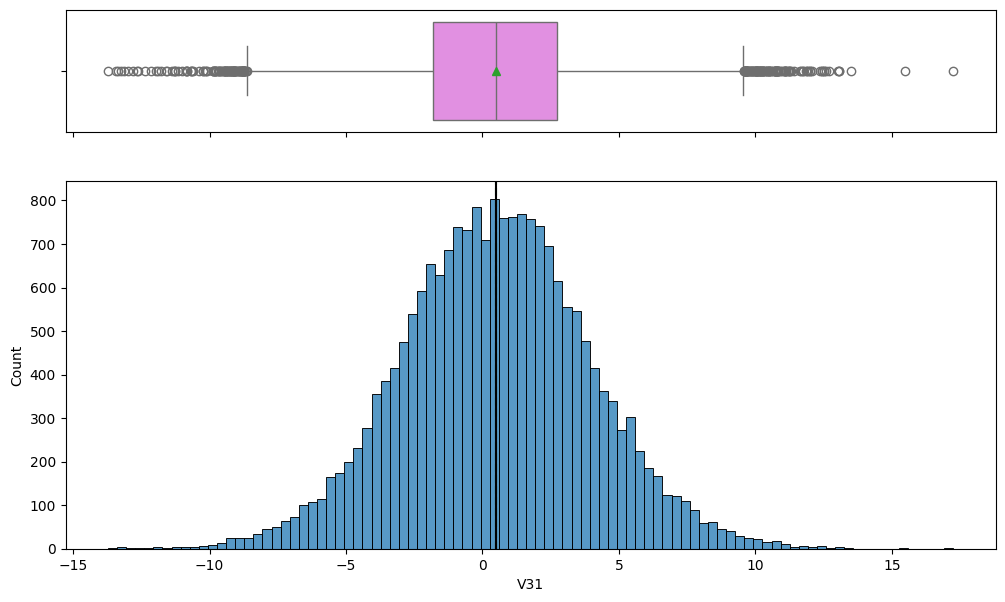

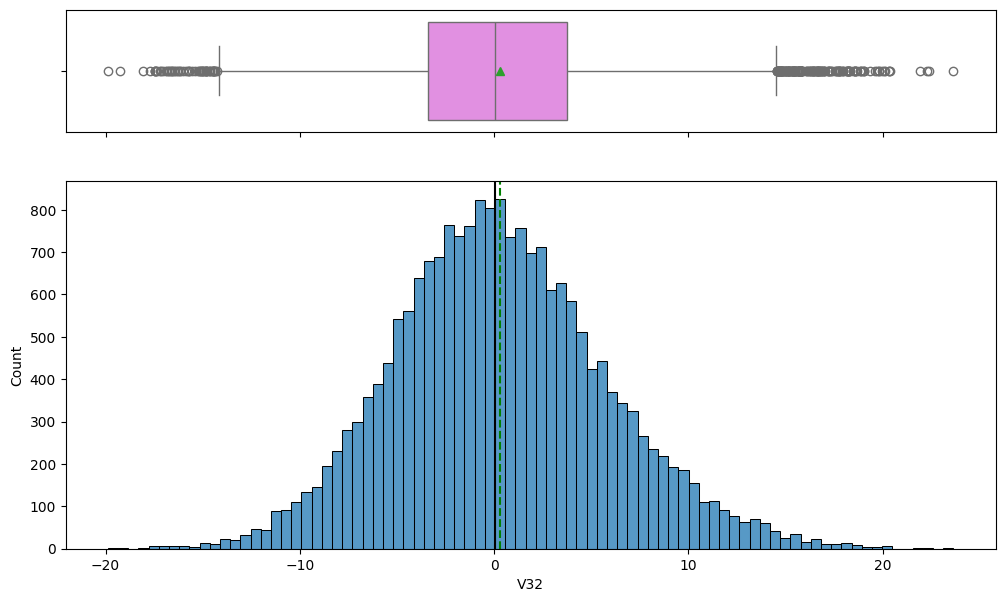

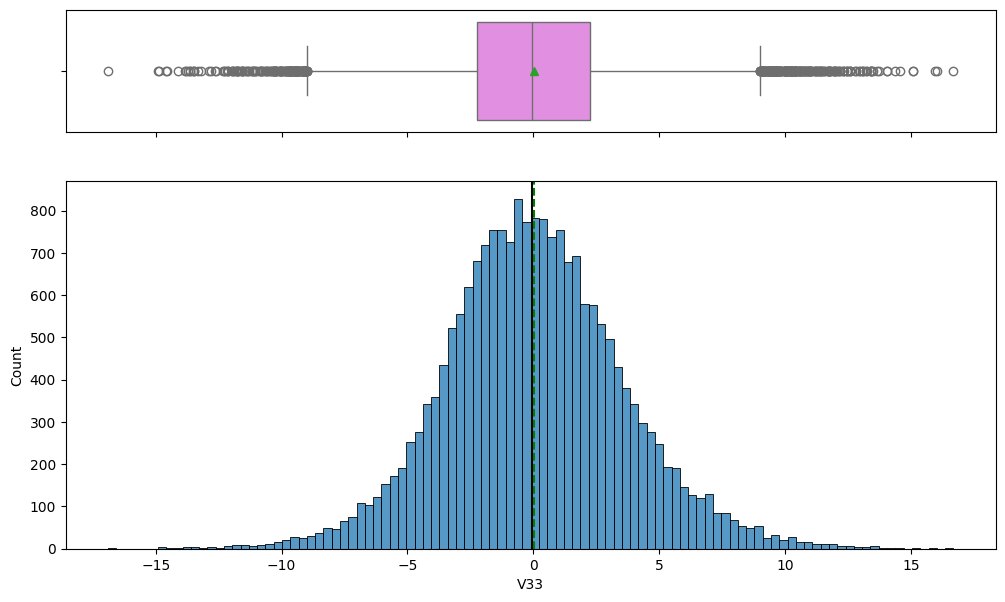

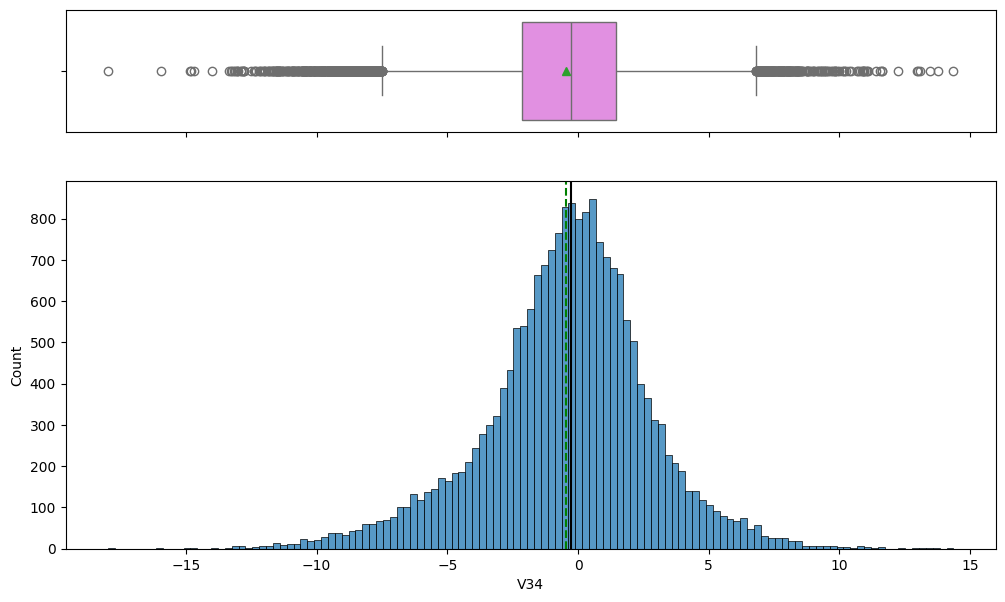

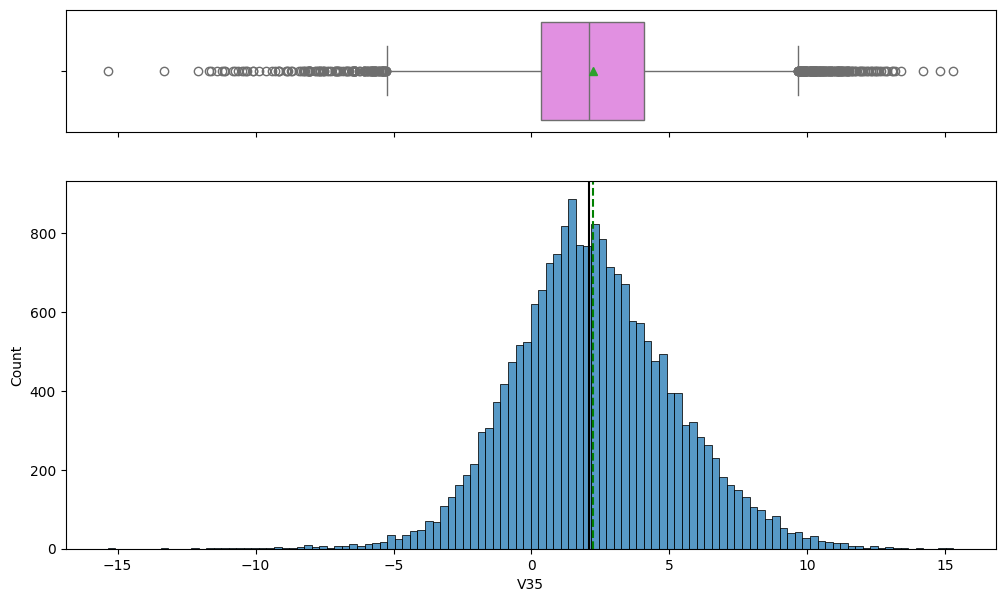

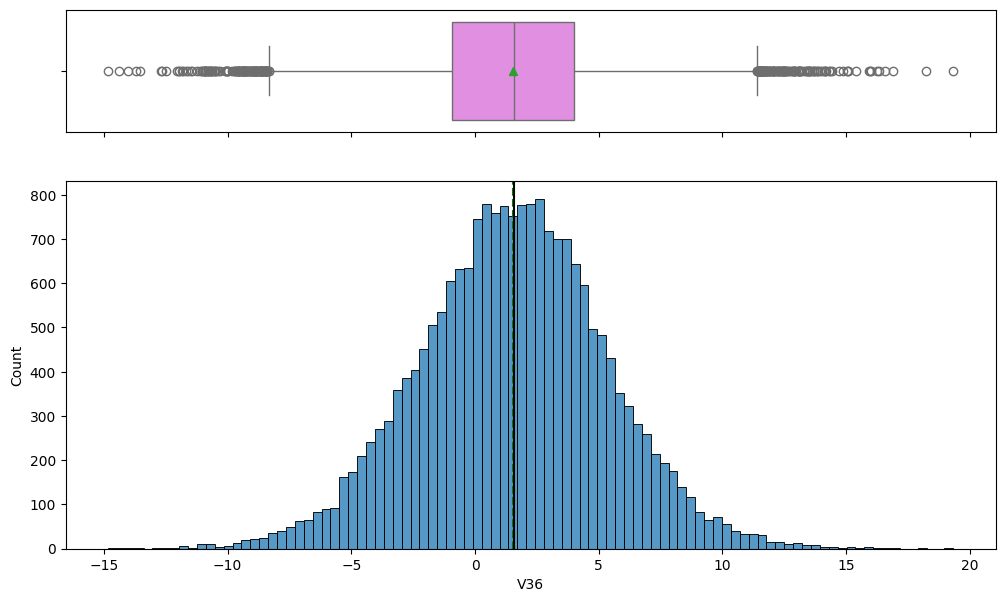

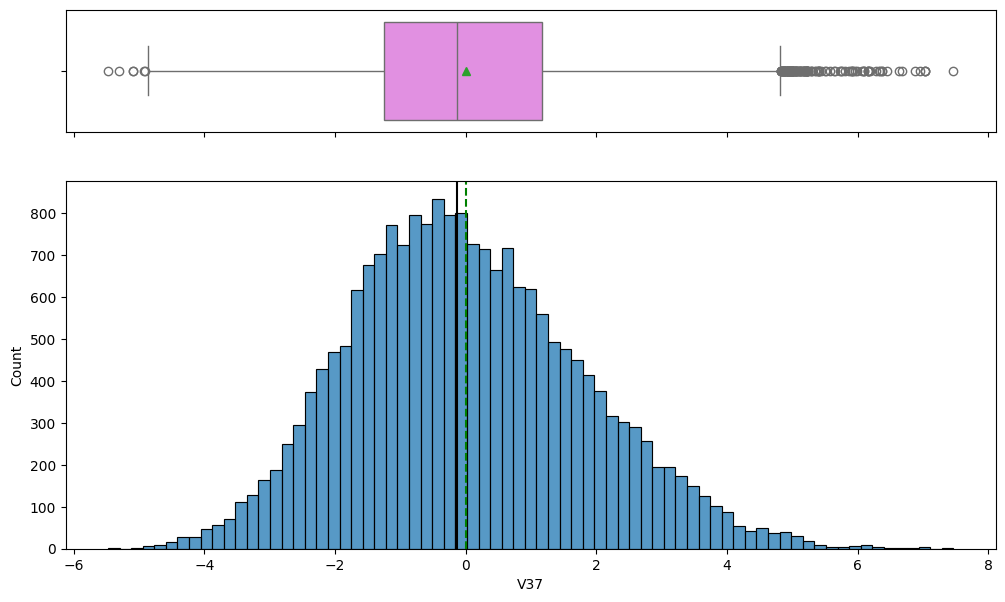

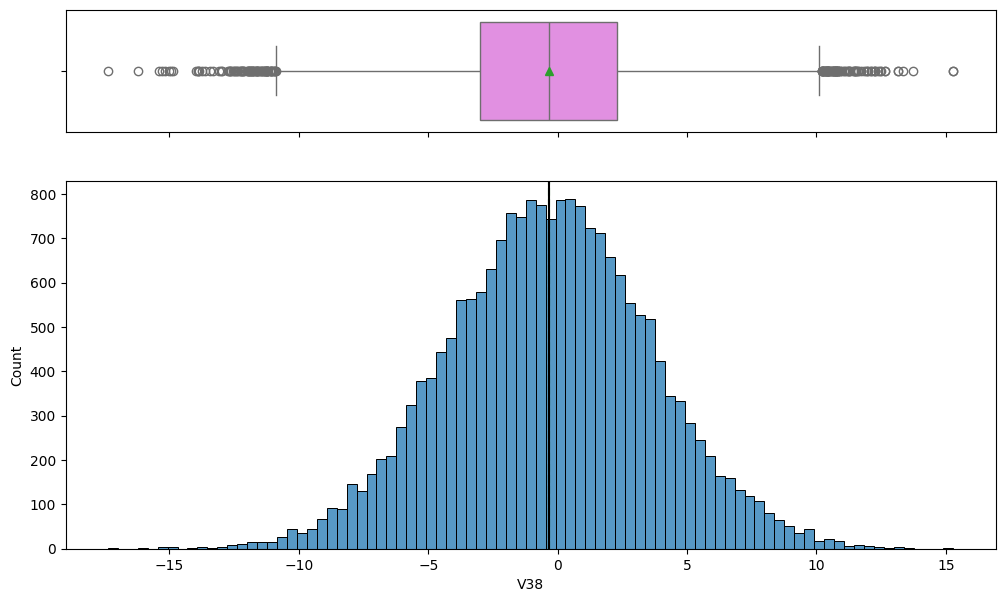

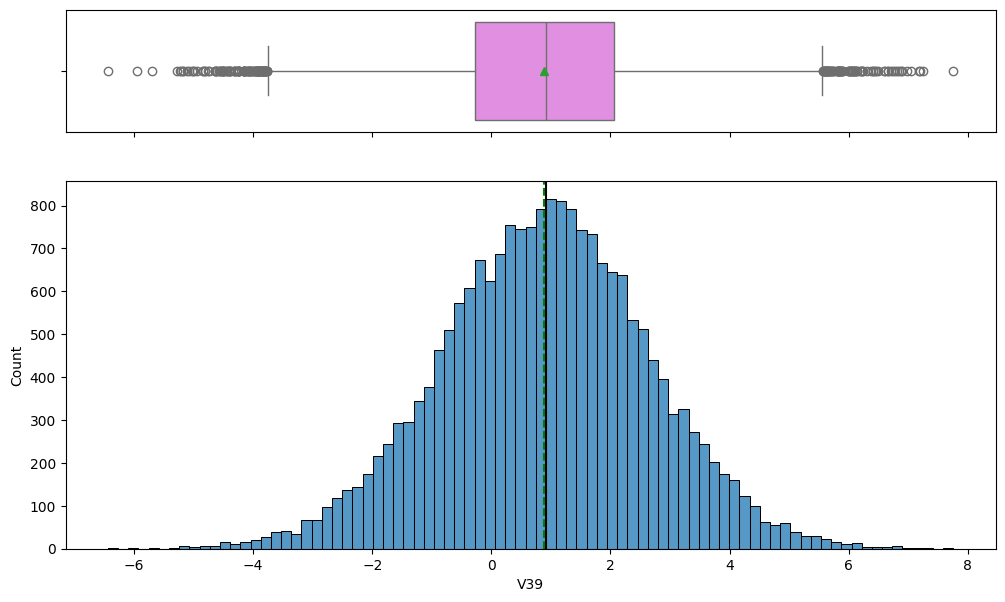

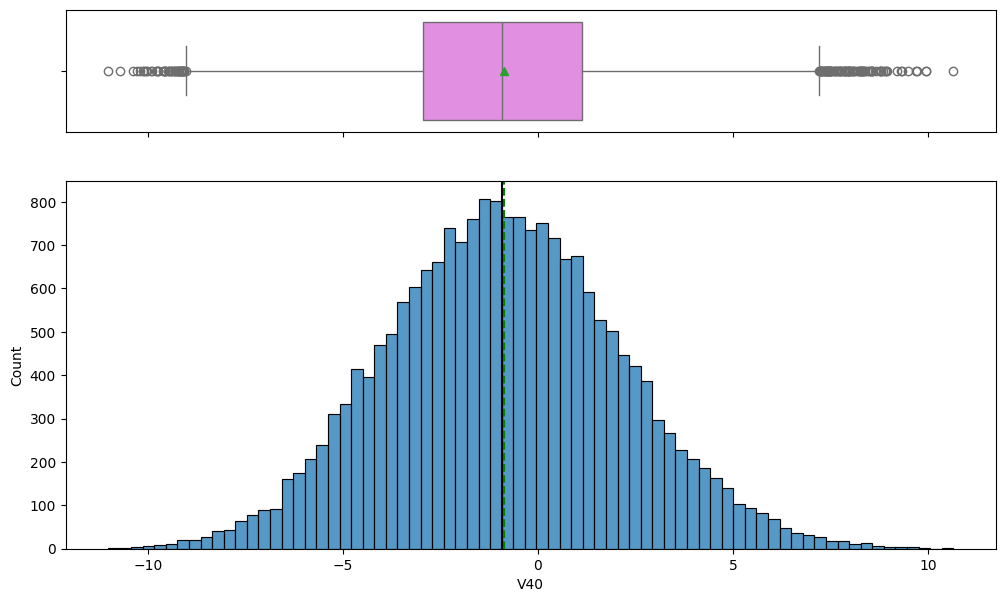

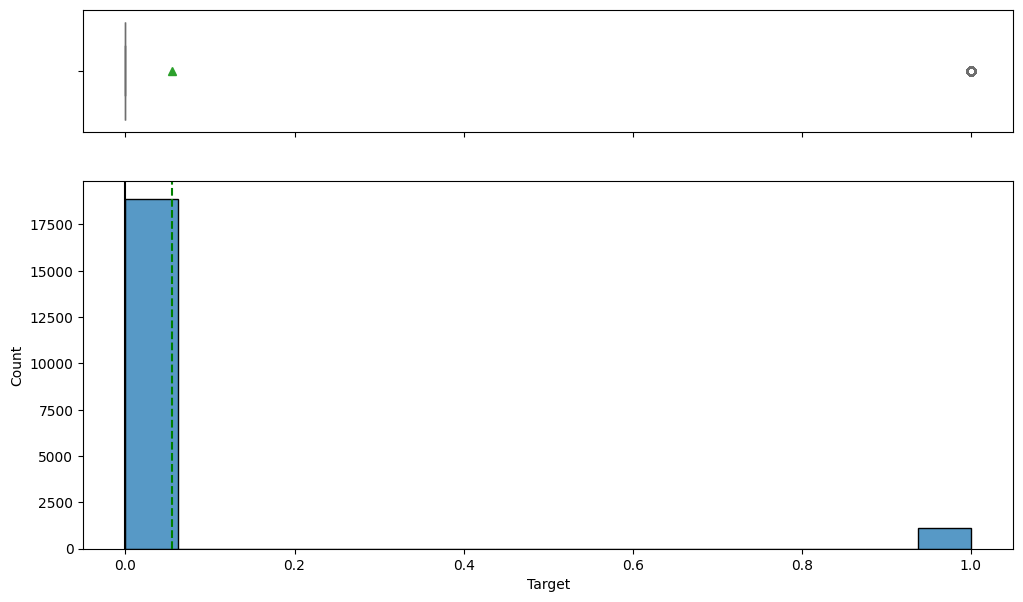

In [ ]:
for feature in data.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

**Observation:**
- Sensor data from the predictor V1 can be seen having a slight right skew, but sensor data from majority of other predictors seem to be having a normal distribution.
- We also observe outliers within the dataset, but due to lack of understanding of the data we assume these values to be valid.

### **Bivariate Analysis**

**Correlation Check**

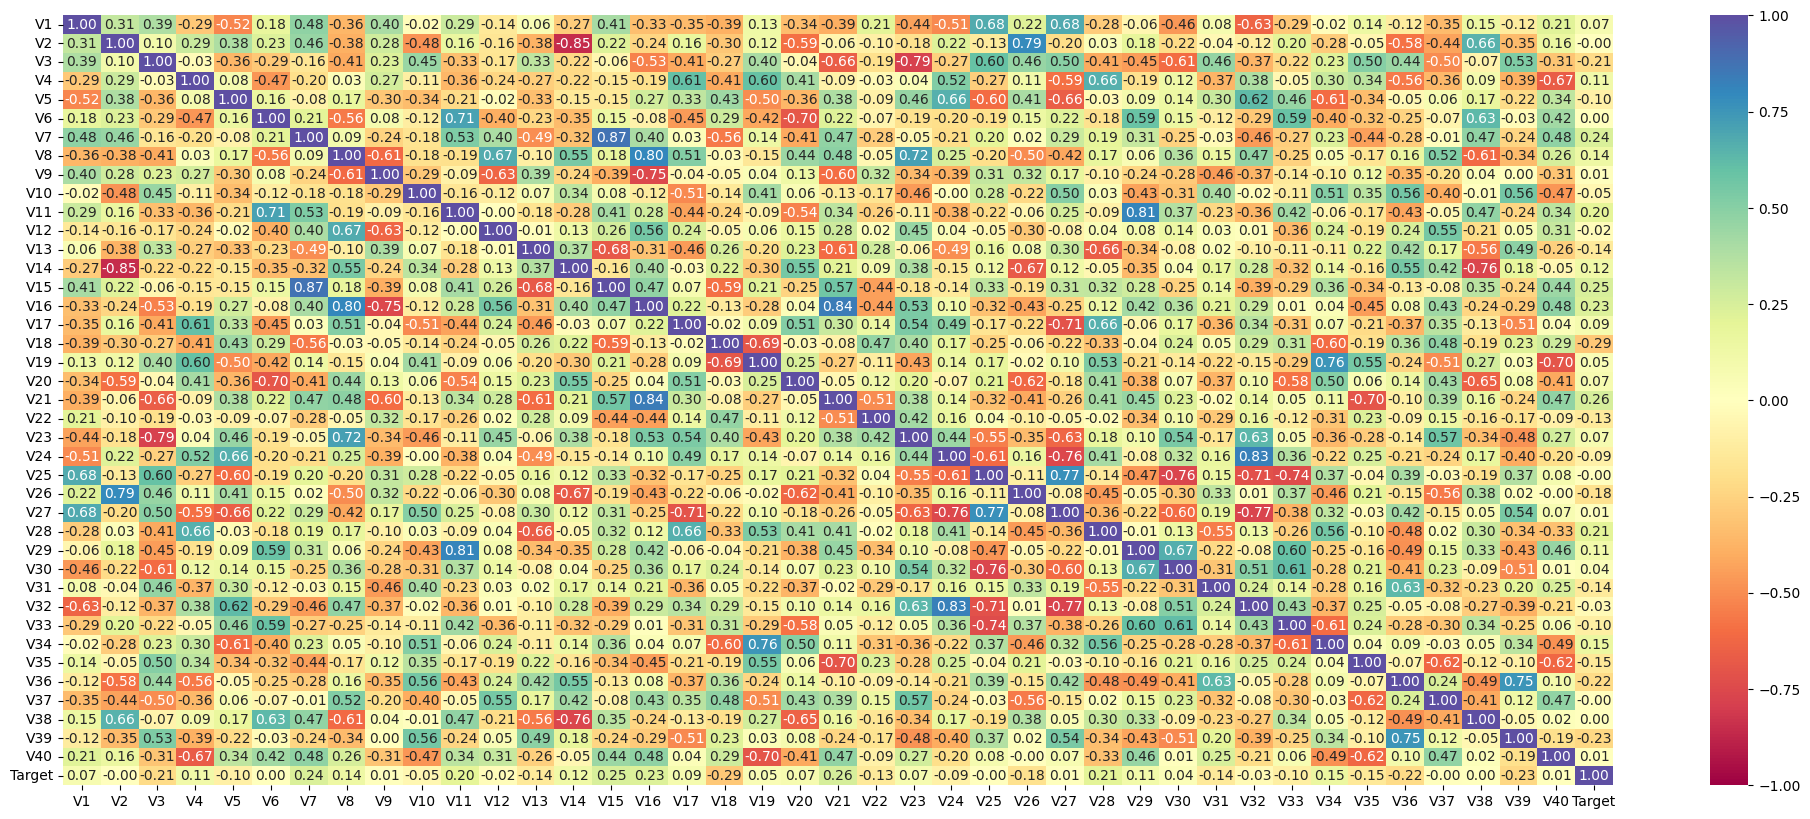

In [ ]:
plt.figure(figsize=(25, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation:**
- We see some strong positive correlations between variables:
  - V1 & V25/V27
  - V2 & V26/V38
  - V3 & V25
  - V4 & V28
  - V5 & V24/V32
  - V6 & V11/V38
  - V7 & V15
  - V8 & V12/V16/V23

- We also see some strong negative correlations between variables:
  - V2 & V14
  - V3 & V21/V23/V30
  - V4 & V27/V40
  - V5 & V25/V27/V34
  - V6 & V20
  - V8 & V9/V38 and some others

**Check the influence on Independent variables on the Dependent variable**

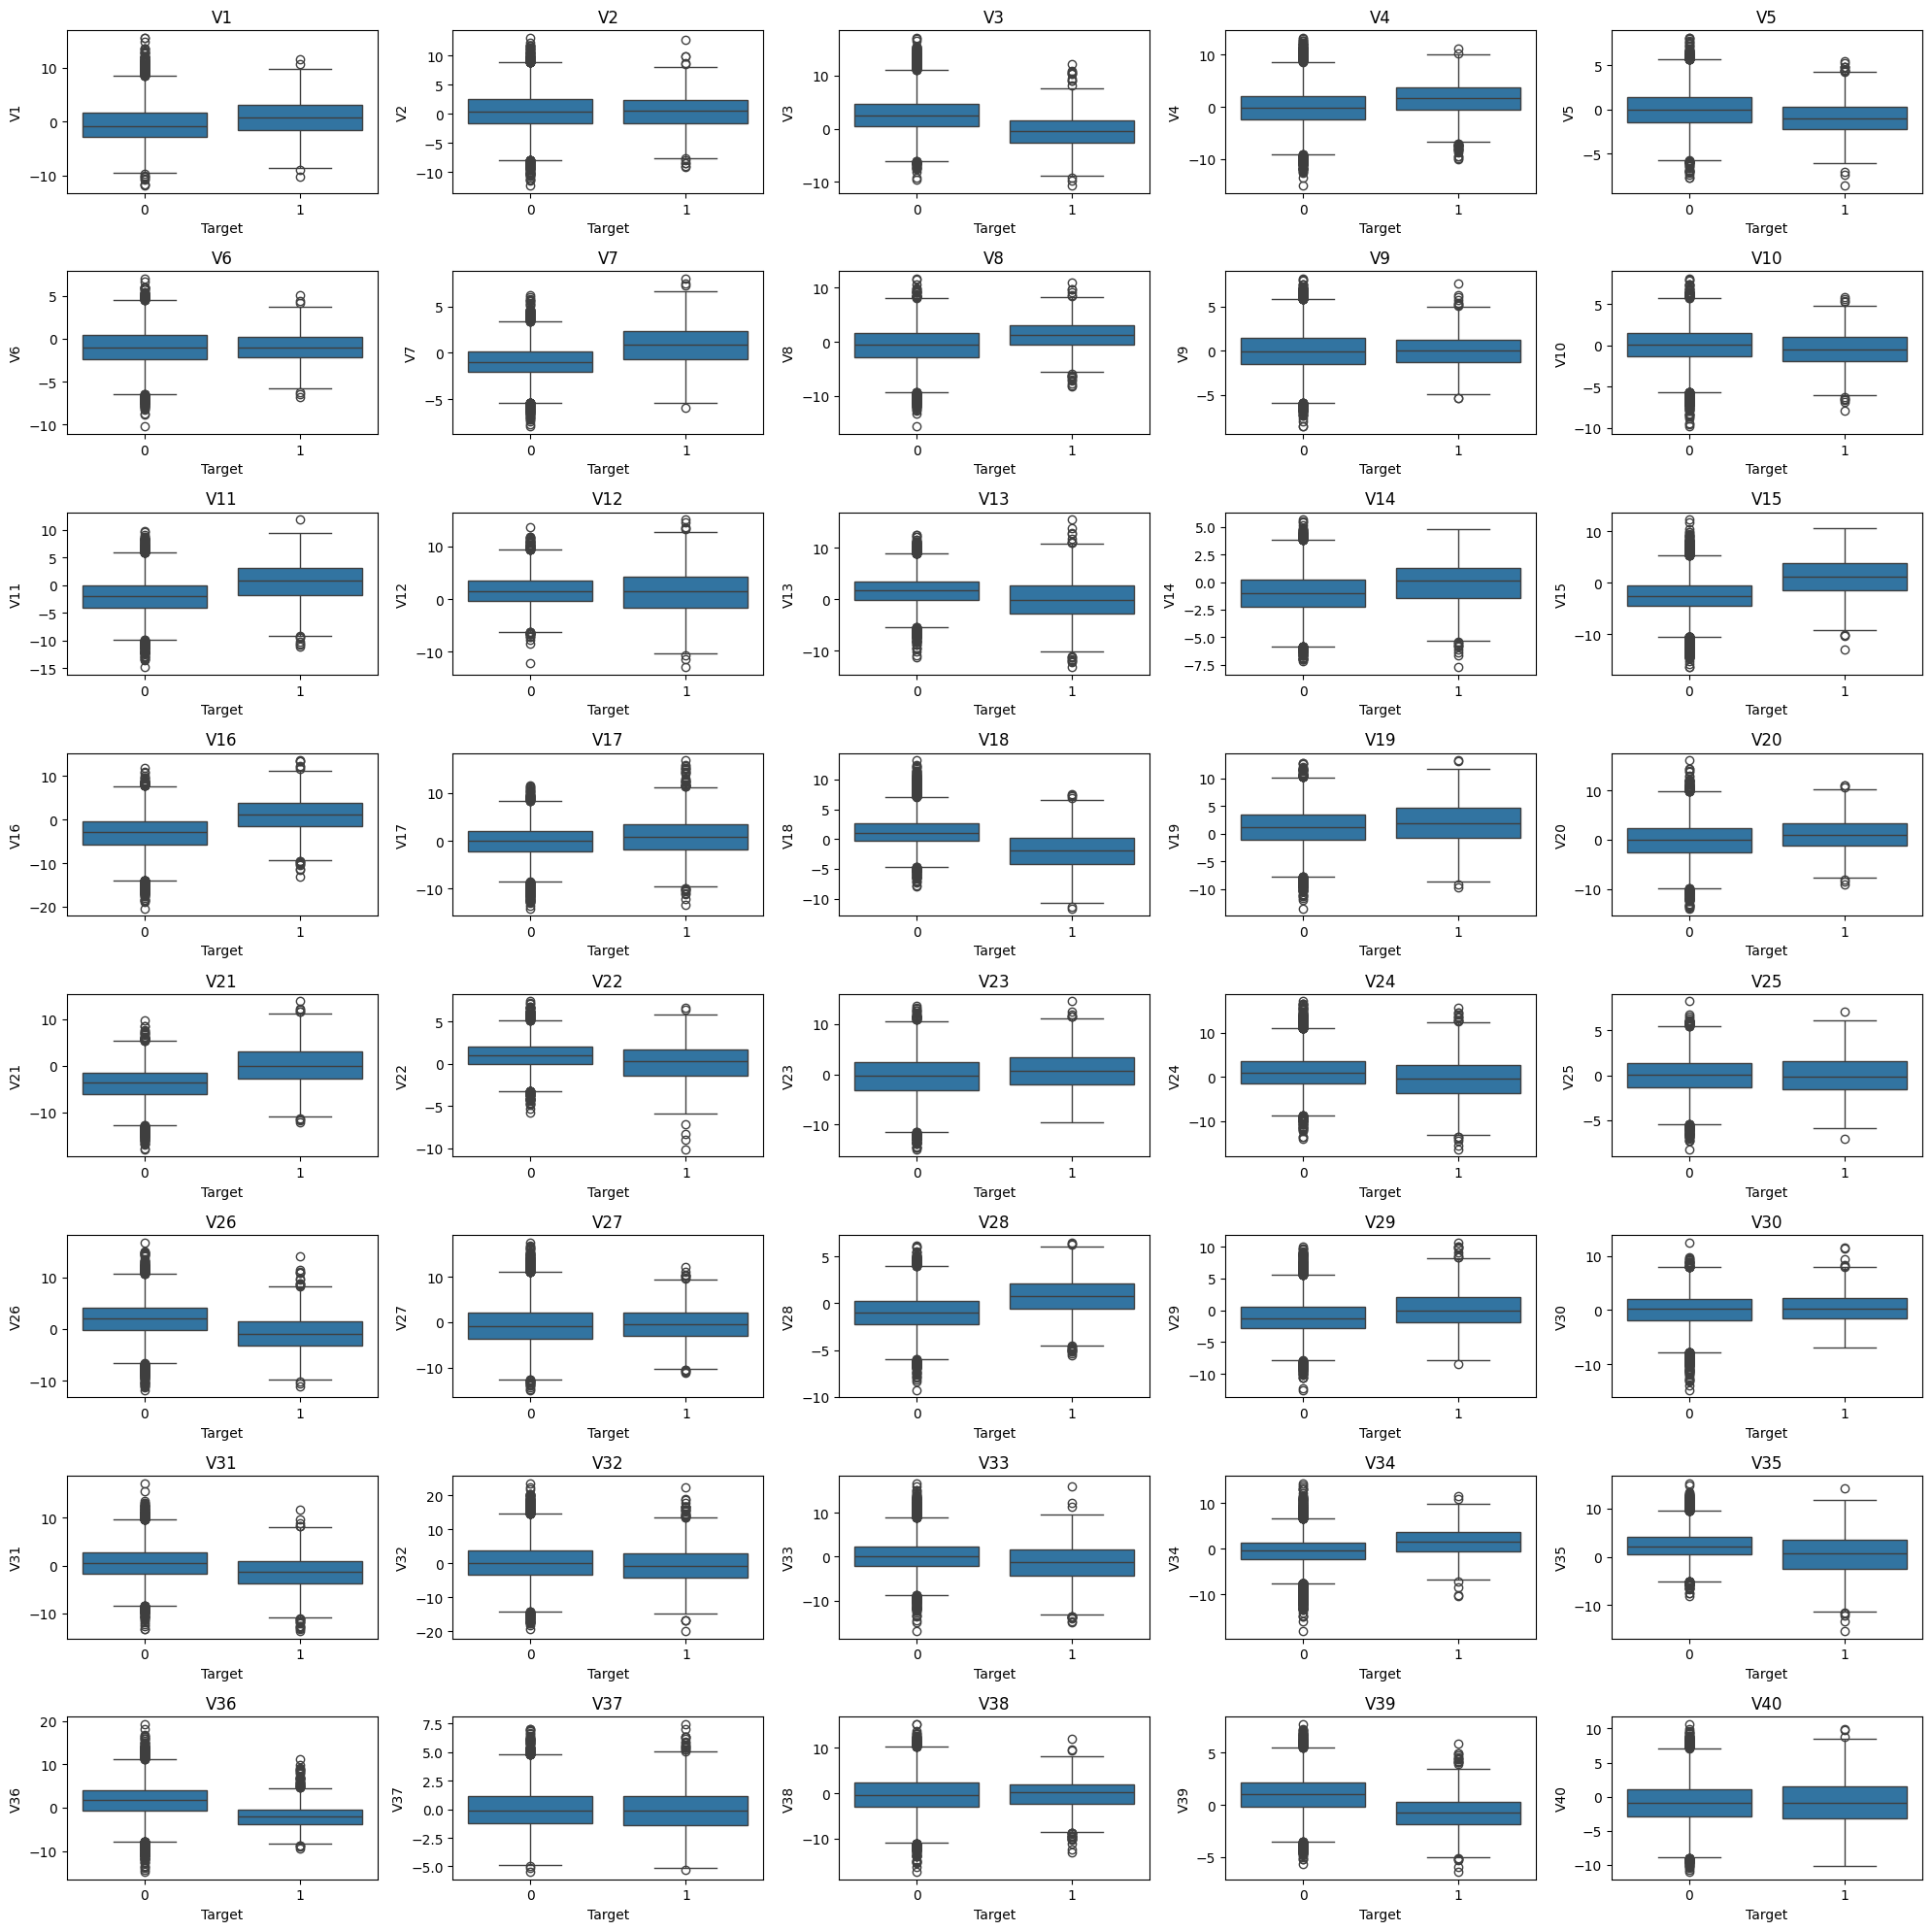

In [ ]:
cols = data.loc[:, data.columns != 'Target'].columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(cols):
    plt.subplot(8, 5, i + 1)
    sns.boxplot(x=data["Target"], y=data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observation:**
- Each plot shows which part (represented by its predictor sensor data) are more likely to affect the generator failure of the wind turbines than others.
- From the above plot, values from sensor data for parts from V4, V7, V8, V11, V14, V15, V16, V21, V28, V31 predictors give higher values when they tend to fail.
- Whereas, values from sensor data for parts from V3, V5, V13, V18, V22, V24, V26, V33, V35, V36 & V39 predictors give lower values when they tend to fail. These parts will need to be monitored to save the maintenance cost.

### **Let's look at the values in target variable**

In [ ]:
# checking the distribution of the target variable for train dataset
data["Target"].value_counts(1)

0   0.945
1   0.056
Name: Target, dtype: float64

In [ ]:
# checking the distribution of the target variable for test dataset
data_test["Target"].value_counts(1)

0   0.944
1   0.056
Name: Target, dtype: float64

**Observation:** As we see from both Test data and Train data, ~94% of the signals received do not indicate failures whereas ~6% of the signals received do indicare failures. This is a highly imbalanced dataset.

## Data Pre-processing

In [ ]:
# Dividing train data into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]

**Since we already have a separate test set, we don't need to divide data into train, valiation and test**


In [ ]:
# Splitting data into training and validation set:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
print(X_train.shape, X_val.shape)

(15000, 40) (5000, 40)


In [ ]:
# Dividing test data into X_test and y_test

X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]
print(X_test.shape)

(5000, 40)


## **Missing value imputation**




In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)

print(X_val.isna().sum())
print("-" * 30)

print(X_test.isna().sum())
print("-" * 30)

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

In [ ]:
# Re-check the distribution of the target variable for train dataset post missing value imputation
print("Target value ratio in y")
print(y.value_counts(1))
print("-" * 30)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("-" * 30)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("-" * 30)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("-" * 30)

Target value ratio in y
0   0.945
1   0.056
Name: Target, dtype: float64
------------------------------
Target value ratio in y_train
0   0.945
1   0.055
Name: Target, dtype: float64
------------------------------
Target value ratio in y_val
0   0.944
1   0.056
Name: Target, dtype: float64
------------------------------
Target value ratio in y_test
0   0.944
1   0.056
Name: Target, dtype: float64
------------------------------


## **Model Building**

### **Model evaluation criterion**

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### **Defining scorer to be used for cross-validation and hyperparameter tuning**

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### **Building Initial Models**

**Let's start by building different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

### **Model Building with original data**

### **Sample Decision Tree model building with original data**

In [ ]:
%%time
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(solver="newton-cg", random_state=1)))
models.append(("DecisionTree Classifier", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
models.append(("Random Forest Classifier", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost Classifier", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting Classifier", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost Classifier", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic Regression: 0.4927566553639709
DecisionTree Classifier: 0.6982829521679532
Bagging Classifier: 0.7210807301060529
Random Forest Classifier: 0.7235192266070268
AdaBoost Classifier: 0.6309140754635308
Gradient Boosting Classifier: 0.7066661857008874
XGBoost Classifier: 0.8100497799581561

Validation Performance:

Logistic Regression: 0.48201438848920863
DecisionTree Classifier: 0.7050359712230215
Bagging Classifier: 0.7302158273381295
Random Forest Classifier: 0.7266187050359713
AdaBoost Classifier: 0.6762589928057554
Gradient Boosting Classifier: 0.7230215827338129
XGBoost Classifier: 0.8309352517985612
CPU times: user 5min 22s, sys: 1.13 s, total: 5min 23s
Wall time: 5min 21s


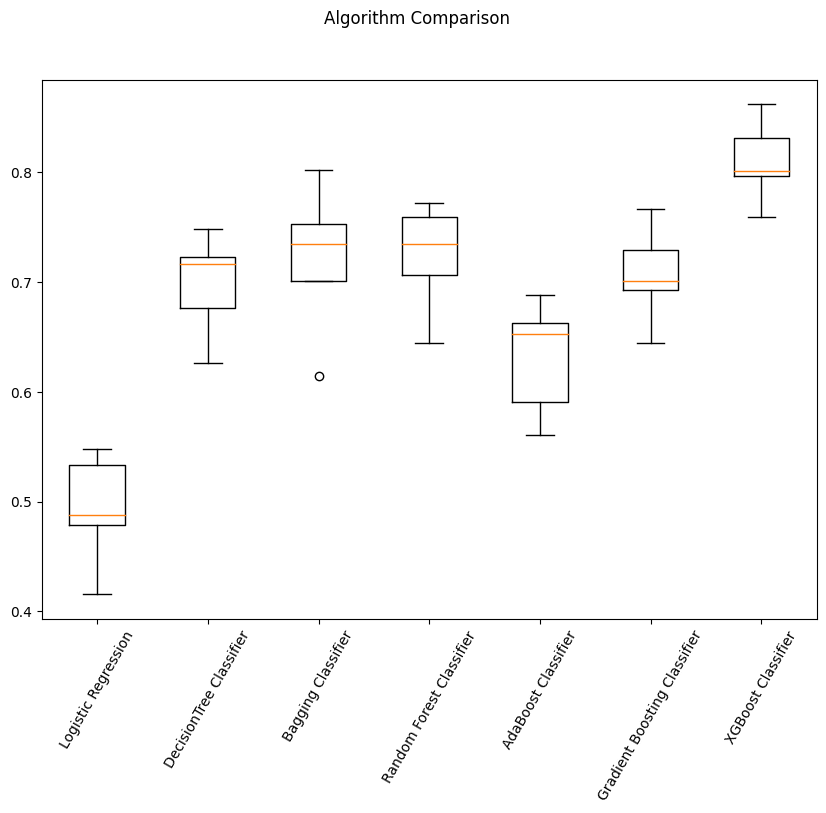

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
plt.xticks(rotation=60, fontsize=10)
ax.set_xticklabels(names)

plt.show()

### **Model Building with Oversampled data**


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 832
Before OverSampling, counts of label '0': 14168 

After OverSampling, counts of label '1': 14168
After OverSampling, counts of label '0': 14168 

After OverSampling, the shape of train_X: (28336, 40)
After OverSampling, the shape of train_y: (28336,) 



In [ ]:
%%time
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(solver="newton-cg", random_state=1)))
models.append(("DecisionTree Classifier", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
models.append(("Random Forest Classifier", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost Classifier", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting Classifier", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost Classifier", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )  ## Complete the code to build models on oversampled data
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over,y_train_over)## Complete the code to build models on oversampled data
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic Regression: 0.883963699328486
DecisionTree Classifier: 0.9720494245534969
Bagging Classifier: 0.9762141471581656
Random Forest Classifier: 0.9839075260047615
AdaBoost Classifier: 0.8978689011775473
Gradient Boosting Classifier: 0.9256068151319724
XGBoost Classifier: 0.9891305241357218

Validation Performance:

Logistic Regression: 0.8489208633093526
DecisionTree Classifier: 0.7769784172661871
Bagging Classifier: 0.8345323741007195
Random Forest Classifier: 0.8489208633093526
AdaBoost Classifier: 0.8561151079136691
Gradient Boosting Classifier: 0.8776978417266187
XGBoost Classifier: 0.8669064748201439
CPU times: user 9min 3s, sys: 1.97 s, total: 9min 5s
Wall time: 8min 58s


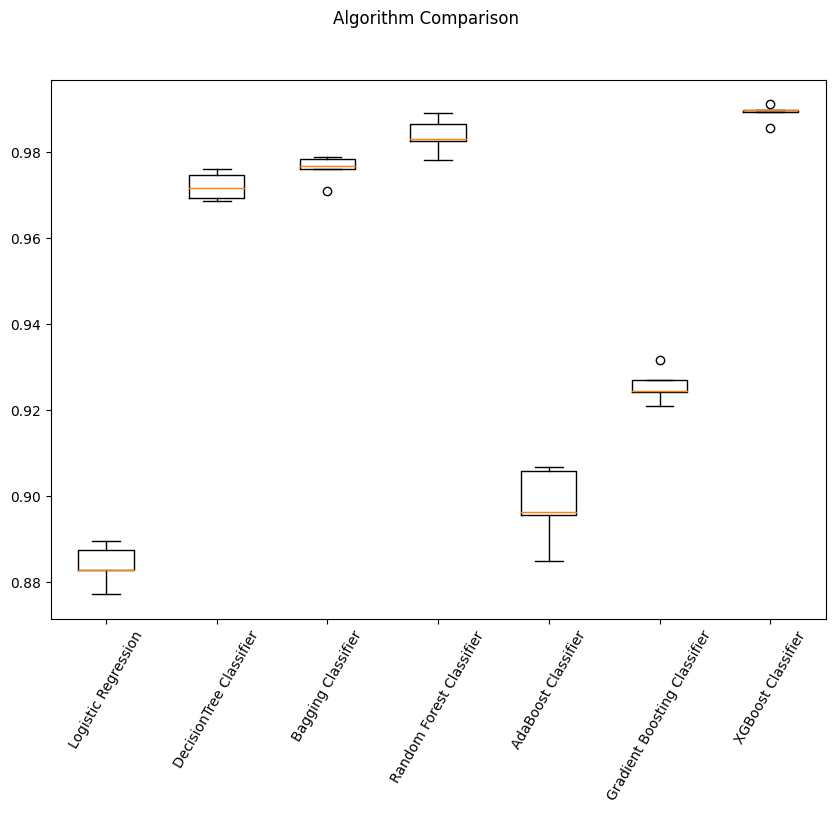

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
plt.xticks(rotation=60, fontsize=10)
ax.set_xticklabels(names)

plt.show()

### **Model Building with Undersampled data**

In [ ]:
# Random undersampler for under sampling the data

rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 

After UnderSampling, counts of label '1': 832
After UnderSampling, counts of label '0': 832 

After UnderSampling, the shape of train_X: (1664, 40)
After UnderSampling, the shape of train_y: (1664,) 



In [ ]:
%%time
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(solver="newton-cg", random_state=1)))
models.append(("DecisionTree Classifier", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
models.append(("Random Forest Classifier", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost Classifier", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting Classifier", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost Classifier", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )  ## Complete the code to build models on undersampled data
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un,y_train_un)## Complete the code to build models on undersampled data
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic Regression: 0.8726138085275232
DecisionTree Classifier: 0.8617776495202367
Bagging Classifier: 0.8641945025611427
Random Forest Classifier: 0.9038669648654498
AdaBoost Classifier: 0.8666113556020489
Gradient Boosting Classifier: 0.8990621167303946
XGBoost Classifier: 0.9014717552846114

Validation Performance:

Logistic Regression: 0.8525179856115108
DecisionTree Classifier: 0.841726618705036
Bagging Classifier: 0.8705035971223022
Random Forest Classifier: 0.8920863309352518
AdaBoost Classifier: 0.8489208633093526
Gradient Boosting Classifier: 0.8884892086330936
XGBoost Classifier: 0.89568345323741
CPU times: user 31.2 s, sys: 452 ms, total: 31.6 s
Wall time: 29.1 s


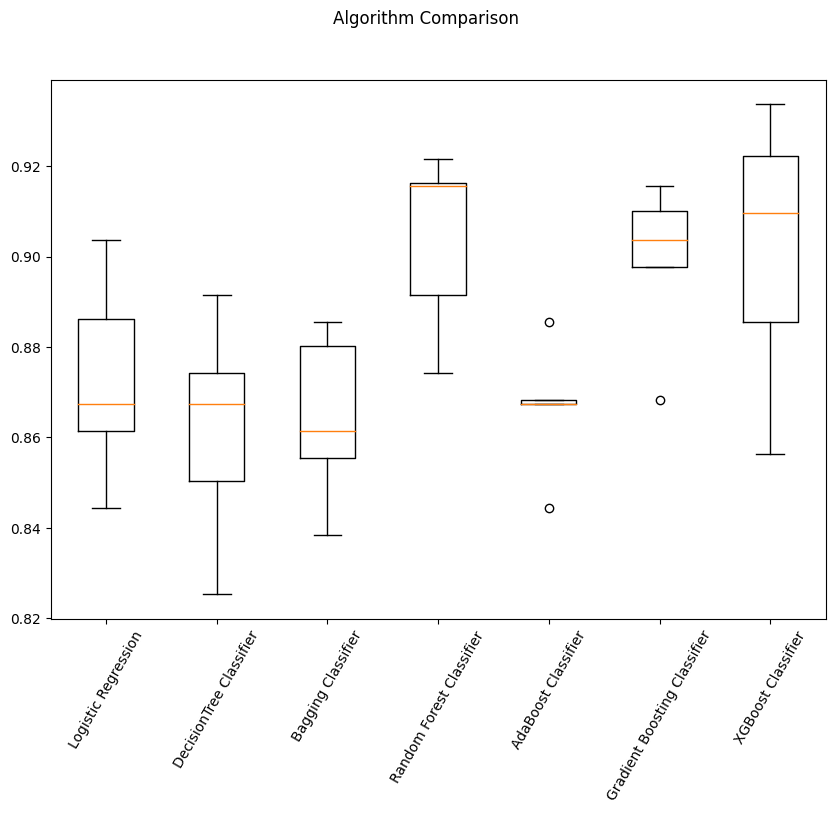

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
plt.xticks(rotation=60, fontsize=10)
ax.set_xticklabels(names)

plt.show()

**After looking at performance of all the models, let's decide which models can further improve with hyperparameter tuning.**


In [ ]:
Built_Models = ['Model_Log', 'Model_Log_O', 'Model_Log_U','Model_DT', 'Model_DT_O', 'Model_DT_U', 'Model_Bag', 'Model_Bag_O', 'Model_Bag_U', 'Model_RF', 'Model_RF_O', 'Model_RF_U',
          'Model_ADB', 'Model_ADB_O', 'Model_ADB_U','Model_GB', 'Model_GB_O', 'Model_GB_U', 'Model_XGB', 'Model_XGB_O', 'Model_XGB_U' ]
TR = [0.492, 0.883, 0.872,
      0.698, 0.972, 0.861,
      0.721, 0.976, 0.864,
      0.723, 0.983, 0.903,
      0.630, 0.897, 0.866,
      0.706, 0.925, 0.899,
      0.810, 0.989, 0.901]
VR = [0.482, 0.848, 0.852,
      0.705, 0.776, 0.841,
      0.730, 0.834, 0.870,
      0.726, 0.848, 0.892,
      0.676, 0.856, 0.848,
      0.723, 0.877, 0.888,
      0.830, 0.866, 0.895]

df_models = pd.DataFrame({'Models':Built_Models,'Training Recall':TR, 'Validation Recall':VR})
df_models['Difference_in_basis_pnt']=(df_models['Training Recall']-df_models['Validation Recall'])*100
df_models

,Models,Training Recall,Validation Recall,Difference_in_basis_pnt
0,Model_Log,0.492,0.482,1.000
1,Model_Log_O,0.883,0.848,3.500
2,Model_Log_U,0.872,0.852,2.000
3,Model_DT,0.698,0.705,-0.700
4,Model_DT_O,0.972,0.776,19.600
5,Model_DT_U,0.861,0.841,2.000
6,Model_Bag,0.721,0.730,-0.900
7,Model_Bag_O,0.976,0.834,14.200
8,Model_Bag_U,0.864,0.870,-0.600
9,Model_RF,0.723,0.726,-0.300


**Observation:**

We can observe that below models are overfitting:
- Tuned Decision Tree using oversampled data (Model_DT_O)
- Tuned Bagging classifier using oversampled data (Model_Bag_O)
- Tuned Random Forest classifier using oversampled data (Model_RF_O)
- Tuned XGBoost classifier using oversampled data (Model_XGB_O)

We shall consider below models for hyperparameter tuning due to lower difference between Training and Validation recall score:
- Tuned Decision Tree using undersampled data (Model_DT_U)
- Tuned Bagging classifier using undersampled data (Model_Bag_U)
- Tuned Random Forest classifier using undersampled data (Model_RF_U)
- Tuned Adaboost classifier using oversampled data (Model_ADB_O)
- Tuned Adaboost classifier using undersampled data (Model_ADB_U)
- Tuned Gradient Boost classifier using oversampled data (Model_GB_O)
- Tuned Gradient Boost classifier using undersampled data (Model_GB_U)
- Tuned XGBoost classifier using oversampled data (Model_XGB)
- Tuned XGBoost classifier using undersampled data (Model_XGB_U)

**Note:**
- '_O' - Represents models built with Oversampled Data,
- '_U' - Represents models built with Undersampled Data

## **HyperparameterTuning**

### **Sample tuning method for Decision tree with undersampled data**

In [ ]:
%%time

# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 2} with CV score=0.850811629752543:
CPU times: user 166 ms, sys: 111 ms, total: 277 ms
Wall time: 3.3 s


In [ ]:
# building model with best parameters
dt_tuned_un = DecisionTreeClassifier(
    max_depth= 2,
    random_state=1,
    min_samples_leaf= 1,
    max_leaf_nodes= 5,
    min_impurity_decrease= 0.001,
)

# Fit the model on training data
dt_tuned_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

In [ ]:
## To check the performance on training set
dt_un_train = model_performance_classification_sklearn(dt_tuned_un, X_train_un, y_train_un)
dt_un_train

,Accuracy,Recall,Precision,F1
0,0.764,0.909,0.705,0.794


In [ ]:
## To check the performance on validation set
dt_un_val = model_performance_classification_sklearn(dt_tuned_un, X_val, y_val)
dt_un_val

,Accuracy,Recall,Precision,F1
0,0.609,0.888,0.114,0.202


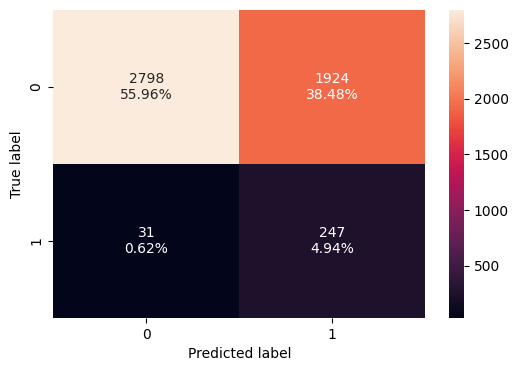

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(dt_tuned_un, X_val, y_val)

**Observation:**
- We have received the recall score of 0.909 and 0.888 on the training and the validation set, respectively.
- **Model is generalizing well on both the train and validation dataset.**

### **Sample tuning method for Bagging Classifier with undersampled data**

In [ ]:
%%time

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators' : [30,50,70],
    'max_features': [0.7,0.8,0.9],
    'max_samples': [0.8,0.9,1],}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.8966236202294207:
CPU times: user 4.13 s, sys: 93.6 ms, total: 4.23 s
Wall time: 59.7 s


In [ ]:
# Creating new pipeline with best parameterstuned_
bagging_tuned_un = BaggingClassifier(
    n_estimators=70,
    max_samples=0.9,
    max_features=0.9,
    random_state=1,
)

# Fit the model on training data
bagging_tuned_un.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [ ]:
## To check the performance on training set
bagging_un_train = model_performance_classification_sklearn(bagging_tuned_un, X_train_over, y_train_over)
bagging_un_train

,Accuracy,Recall,Precision,F1
0,0.945,0.940,0.950,0.945


In [ ]:
## To check the performance on validation set
bagging_un_val = model_performance_classification_sklearn(bagging_tuned_un, X_val, y_val)
bagging_un_val

,Accuracy,Recall,Precision,F1
0,0.938,0.896,0.469,0.616


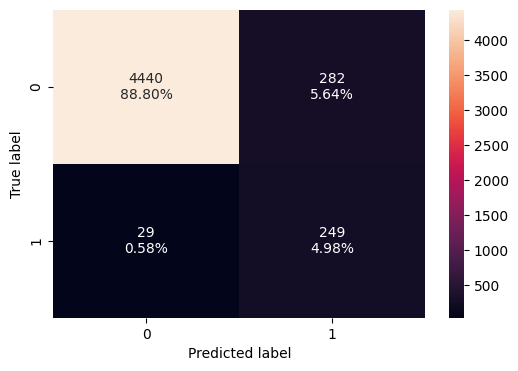

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_tuned_un, X_val, y_val)

**Observation:**
- We have received the recall score of 0.940 and 0.896 on the training and the validation set, respectively.
- Model doesn't look to particularly generalizing well.

### **Tuning Random forest using undersampled data**

In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8978140105331505:
CPU times: user 2.11 s, sys: 95.5 ms, total: 2.21 s
Wall time: 41.1 s


In [ ]:
# Creating new pipeline with best parameters
rf_tuned_un = RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples=0.6,
    n_estimators=250,
    min_samples_leaf=1,
)

# Fit the model on training data
rf_tuned_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=250, random_state=1)

In [ ]:
## To check the performance on training set
rf_un_train = model_performance_classification_sklearn(rf_tuned_un, X_train_over, y_train_over)
rf_un_train

,Accuracy,Recall,Precision,F1
0,0.944,0.935,0.953,0.944


In [ ]:
## To check the performance on validation set
rf_un_val = model_performance_classification_sklearn(rf_tuned_un, X_val, y_val)
rf_un_val

,Accuracy,Recall,Precision,F1
0,0.944,0.885,0.496,0.636


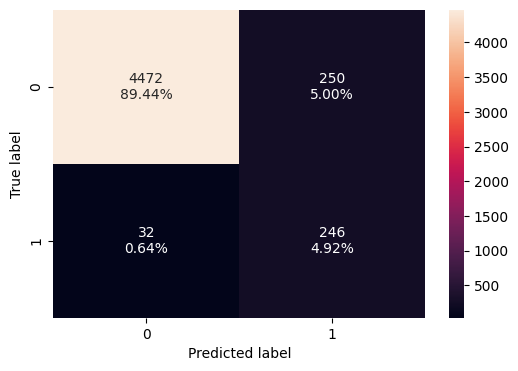

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(rf_tuned_un, X_val, y_val)

**Observation:**
- We have received the recall score of 0.935 and 0.885 on the training and the validation set, respectively.
- Model doesn't look to particularly generalizing well.

### **Tuning AdaBoost using oversampled data**

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9714853746337214:
CPU times: user 2min 19s, sys: 2.77 s, total: 2min 22s
Wall time: 30min 43s


In [ ]:
# building model with best parameters
adb_tuned_over = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.2,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

In [ ]:
# Calculating different metrics on train set
adb_over_train = model_performance_classification_sklearn(adb_tuned_over, X_train_over, y_train_over)
print("Training performance:")
adb_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.992,0.988,0.995,0.992


In [ ]:
# Calculating different metrics on validation set
adb_over_val = model_performance_classification_sklearn(adb_tuned_over, X_val, y_val)
print("Validation performance:")
adb_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.979,0.853,0.790,0.820


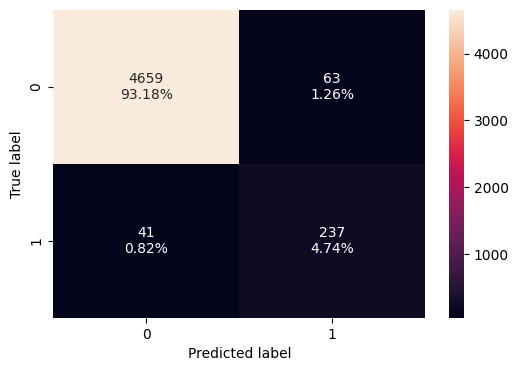

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned_over, X_val, y_val)

**Observation:**
- We have received the recall score of 0.988 and 0.853 on the training and the validation set, respectively.  
- Model doesn't look to particularly generalizing well.

### **Tuning AdaBoost using undersampled data**

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8846114998917827:
CPU times: user 4.25 s, sys: 144 ms, total: 4.39 s
Wall time: 1min 35s


In [ ]:
# building model with best parameters
adb_tuned_un = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.05,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [ ]:
# Calculating different metrics on train set
adb_un_train = model_performance_classification_sklearn(adb_tuned_un, X_train_un, y_train_un)
print("Training performance:")
adb_un_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.931,0.898,0.961,0.929


In [ ]:
# Calculating different metrics on validation set
adb_un_val = model_performance_classification_sklearn(adb_tuned_un, X_val, y_val)
print("Validation performance:")
adb_un_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.921,0.863,0.402,0.549


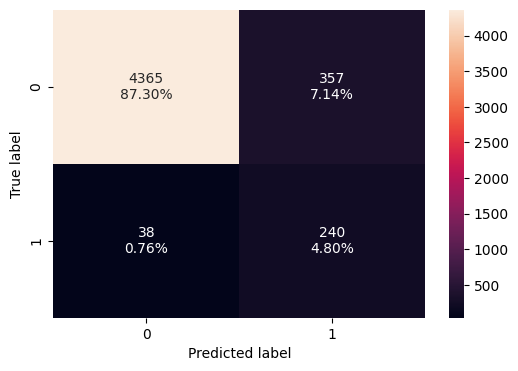

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned_un, X_val, y_val)

**Observation:**
- We have received the recall score of 0.898 and 0.863 on the training and the validation set, respectively.  
- **Model is generalizing well on both the train and validation dataset**

### **Tuning Gradient Boosting using undersampled data**

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=10, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.2} with CV score=0.9014212538777866:
CPU times: user 1.47 s, sys: 53.5 ms, total: 1.53 s
Wall time: 34.7 s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm_un = GradientBoostingClassifier(
    max_features=0.7,
    random_state=1,
    learning_rate=0.2,
    n_estimators=100,
    subsample=0.5
)

tuned_gbm_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7, random_state=1,
                           subsample=0.5)

In [ ]:
# Calculating different metrics on train set
gbm_un_train= model_performance_classification_sklearn(tuned_gbm_un, X_train_un, y_train_un)
gbm_un_train

,Accuracy,Recall,Precision,F1
0,0.991,0.984,0.998,0.991


In [ ]:
# Calculating different metrics on validation set
gbm_un_val = model_performance_classification_sklearn(tuned_gbm_un, X_val, y_val)
gbm_un_val

,Accuracy,Recall,Precision,F1
0,0.919,0.885,0.396,0.547


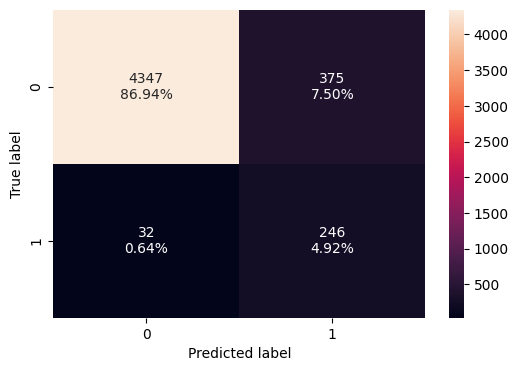

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_gbm_un, X_val, y_val)

**Observation:**
- We have received the recall score of 0.984 and 0.885 on the training and the validation set, respectively.  
- Model doesn't look to particularly generalizing well.

### **Tuning XGBoost using oversampled data**

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],
            'scale_pos_weight':[5,10],
            'learning_rate':[0.1,0.2],
            'gamma':[0,3,5],
            'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.2, 'gamma': 0} with CV score=0.9959769935987322:
CPU times: user 7.24 s, sys: 232 ms, total: 7.47 s
Wall time: 1min 51s


In [ ]:
tuned_xgb_over = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.2,
    gamma=0,
)

tuned_xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculating different metrics on train set
xgb_over_train= model_performance_classification_sklearn(tuned_xgb_over, X_train_over, y_train_over)
xgb_over_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
# Calculating different metrics on validation set
xgb_over_val = model_performance_classification_sklearn(tuned_xgb_over, X_val, y_val)
xgb_over_val

,Accuracy,Recall,Precision,F1
0,0.985,0.871,0.855,0.863


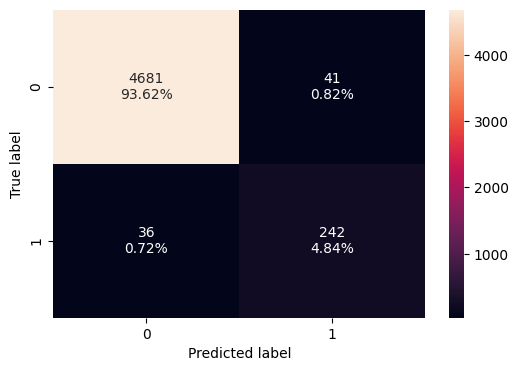

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_xgb_over, X_val, y_val)

**Observation:**
- We have received the recall score of 1.000 and 0.871 on the training and the validation set, respectively.  
- Model doesn't look to particularly generalizing well.

### **Tuning XGBoost using undersampled data**

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],
            'scale_pos_weight':[5,10],
            'learning_rate':[0.1,0.2],
            'gamma':[0,3,5],
            'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9290599523843879:
CPU times: user 1.88 s, sys: 81.8 ms, total: 1.96 s
Wall time: 28 s


In [ ]:
tuned_xgb_un = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.1,
    gamma=5,
)

tuned_xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculating different metrics on train set
xgb_un_train= model_performance_classification_sklearn(tuned_xgb_un, X_train_un, y_train_un)
xgb_un_train

,Accuracy,Recall,Precision,F1
0,0.979,1.000,0.960,0.979


In [ ]:
# Calculating different metrics on validation set
xgb_un_val = model_performance_classification_sklearn(tuned_xgb_un, X_val, y_val)
xgb_un_val

,Accuracy,Recall,Precision,F1
0,0.832,0.921,0.239,0.379


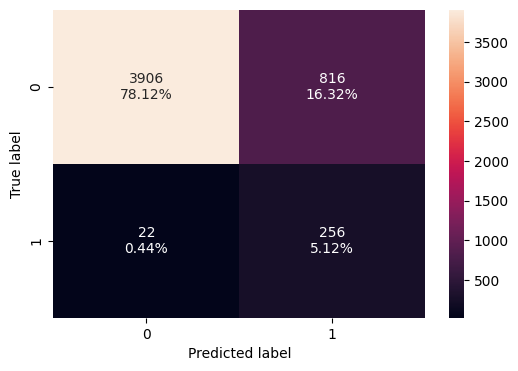

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_xgb_un, X_val, y_val)

**Observation:**
- We have received the recall score of 1.000 and 0.921 on the training and the validation set, respectively.  
- Model doesn't look to particularly generalizing well.

## **Model performance comparison and choosing the final model**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dt_un_train.T,
        bagging_un_train.T,
        rf_un_train.T,
        adb_over_train.T,
        adb_un_train.T,
        gbm_un_train.T,
        xgb_over_train.T,
        xgb_un_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Decision Tree classifier with undersampled data",
    "Tuned Bagging lassifier with undersampled data",
    "Tuned Random forest with undersampled data",
    "Tuned AdaBoost classifier with oversampled data",
    "Tuned AdaBoost classifier with undersampled data",
    "Tuned Gradient Boosting with undersampled data",
    "Tuned XGBoost with oversampled data",
    "Tuned XGBoost with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuned Decision Tree classifier with undersampled data,Tuned Bagging lassifier with undersampled data,Tuned Random forest with undersampled data,Tuned AdaBoost classifier with oversampled data,Tuned AdaBoost classifier with undersampled data,Tuned Gradient Boosting with undersampled data,Tuned XGBoost with oversampled data,Tuned XGBoost with undersampled data
Accuracy,0.764,0.945,0.944,0.992,0.931,0.991,1.000,0.979
Recall,0.909,0.940,0.935,0.988,0.898,0.984,1.000,1.000
Precision,0.705,0.950,0.953,0.995,0.961,0.998,1.000,0.960
F1,0.794,0.945,0.944,0.992,0.929,0.991,1.000,0.979


In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        dt_un_val.T,
        bagging_un_val.T,
        rf_un_val.T,
        adb_over_val.T,
        adb_un_val.T,
        gbm_un_val.T,
        xgb_over_val.T,
        xgb_un_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Tuned Decision Tree classifier with undersampled data",
    "Tuned Bagging lassifier with undersampled data",
    "Tuned Random forest with undersampled data",
    "Tuned AdaBoost classifier with oversampled data",
    "Tuned AdaBoost classifier with undersampled data",
    "Tuned Gradient Boosting with undersampled data",
    "Tuned XGBoost with oversampled data",
    "Tuned XGBoost with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Tuned Decision Tree classifier with undersampled data,Tuned Bagging lassifier with undersampled data,Tuned Random forest with undersampled data,Tuned AdaBoost classifier with oversampled data,Tuned AdaBoost classifier with undersampled data,Tuned Gradient Boosting with undersampled data,Tuned XGBoost with oversampled data,Tuned XGBoost with undersampled data
Accuracy,0.609,0.938,0.944,0.979,0.921,0.919,0.985,0.832
Recall,0.888,0.896,0.885,0.853,0.863,0.885,0.871,0.921
Precision,0.114,0.469,0.496,0.790,0.402,0.396,0.855,0.239
F1,0.202,0.616,0.636,0.820,0.549,0.547,0.863,0.379


**Observation:**
- Although, the tuned Decision Tree model & Adaboost models using undersampling data are generalizing well on the test and validation set, the tuned XGBoost classifier model using undersampling data is giving the best validation recall of 0.921. Hence, we would move forward with the XGBoost classifier model with undersmapling data.
- Let's check the model's performance on test set and then see the feature importance from the tuned XGBoost classifier model.

## **Let's check the final model's performance on the test set.**

In [ ]:
# Calculating different metrics on the test set
xgb_un_grid_test = model_performance_classification_sklearn(tuned_xgb_un, X_test, y_test)
print("Test performance:")
xgb_un_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.834,0.890,0.239,0.376


**Observation:**
- The Recall score on test data is 0.890 compared to the 0.921 on validation data. Hence, the model is generalising well.
- Let's check the important features for prediction as per the the final model

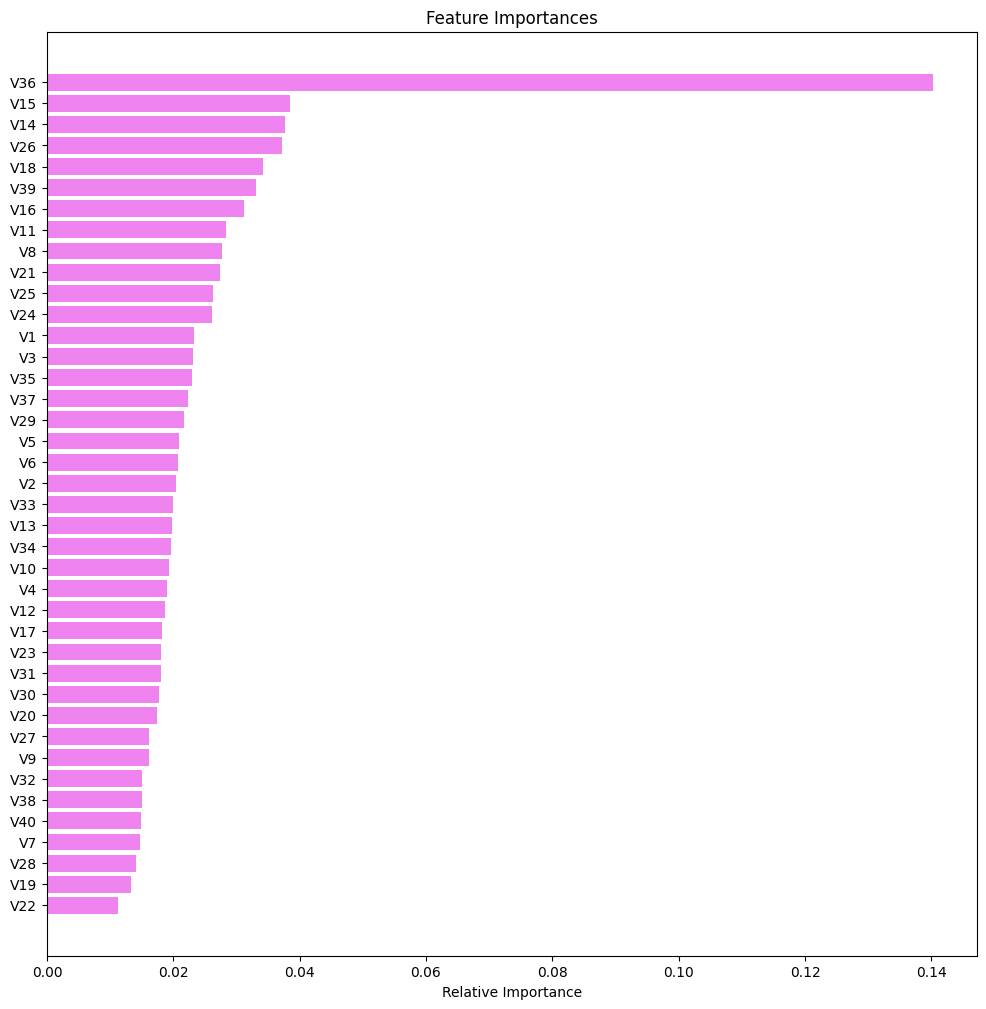

In [ ]:
feature_names = X.columns
importances = tuned_xgb_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:** The most important feature in the model is V36.

## **Pipelines to build the final model**

- Since we have only one datatype in the data, we don't need to use column transformer here


In [ ]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test1 = df_test.drop(columns="Target")
y_test1 = df_test['Target']


In [ ]:
# We can't oversample/undersample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# We don't need to impute missing values in test set as it will be done inside pipeline

In [ ]:
#Building a pipeline model with the best model
Pipeline_model = Pipeline(
    steps=[
        ("XGB",
    XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.1,
    gamma=5,     ),
        ),
          ]
                         )

In [ ]:
#undersampling on the data using random undersampling technique
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un,  y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
#Fitting the pipeline model
Pipeline_model.fit (X_train_un,y_train_un)

Pipeline(steps=[('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [ ]:
# Calculating different metrics on test set
Pipeline_model_test = model_performance_classification_sklearn(Pipeline_model, X_test1, y_test1)
print("Final Model performance on Test Dataset:")
Pipeline_model_test

Final Model performance on Test Dataset:


,Accuracy,Recall,Precision,F1
0,0.834,0.890,0.239,0.376


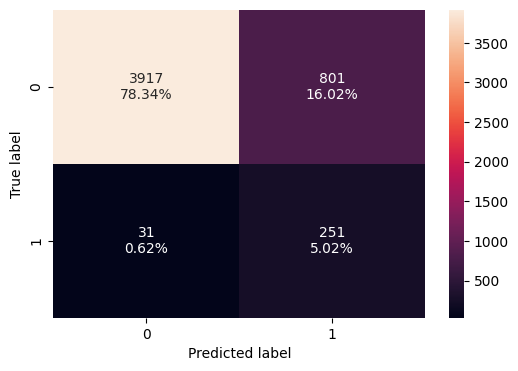

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(Pipeline_model, X_test1, y_test1)

**Observations:**
 - We can observe a recall score of 0.890 on the testing data
 - The tuned XGBoost model with undersampled data generalizes well on the testing data.

## **Business Insights and Conclusions**

#### **Insights:**

We analyzed a dataset of nearly 20,000 observations of the ciphered version of the data from the wind turbines using sensors. The data contains data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). Below are some of the insights surfaced within the dataset:

- Sendor data from the predictor V1 can be seen having a slight right skew, but sensor data from majority of other predictors seem to be having a normal distribution.

- We saw some strong positive & negative correlations between independent variables/predictors.

- Sensor data from V4, V7, V8, V11, V14, V15, V16, V21, V28, V31 predictors show higher values when have failed.

- Whereas, values from sensor data for different components from V3, V5, V13, V18, V22, V24, V26, V33, V35, V36 & V39 predictors give lower values when they tend to fail. These parts will need to be monitored to save the maintenance cost.

After developing a ML-based solution, the main features infuencing whether component(s) would lead to failure or not are:
- V36
- V15
- V14
- V26 &
- V18

while features like V40, V7, V28, V19, & V22 do not seem to be having much of importance.

#### **Conclusions:**

1. The tuned XGBoost model with undersampled data generalized well and gave us the best performance on the validation & test set, with a recall score of 0.921 & 0.890 respectively.

2. Though the model did not have a great precision nor F1 score but had the highest recall score (most important in our case). If the business needs do change in the future, and the company decides to proritize both precision and recall as metrics, we could explore the tuned Adaboost & XGBoost classifer models with oversampled data as they have a good F1 score.

#### **Recommendations:**

**Causal Inference:**  Obtain additional information on the causation of the compnent failures. If causation is only wear and tear related, no further action is required. But, if the causation may be due to poor quality of the components, replace them with higher grade ones.

**Real-Time Alarm:** As the AI-powered systems continuously collect data from various sensors installed on wind turbines, once the value goes above the threshold an Alarm/Signal can be triggered to notify of a possible faulty or nearing failure of that component.

**Schedule Regular Maintenance:** Schedule regular and frequent maintaineance of components that tend to fail more often than others.



## **Appendix**

### **Sample Parameter Grids**

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}